## Topic: Is the Traffic Collision Fatal?

*The dataset contains information about traffic collision events in Toronto from 2006 to 2022, focusing specifically on incidents where a person was either killed or seriously injured (KSI). The goal is to build a binary classification model that predicts whether a collision event would result in a fatality or not.*

## Approach

To approach this project in a Jupyter Notebook, we would typically follow these steps:

>**Data Understanding**: Explore the dataset to understand the features, their data types, and any missing values. Visualize the distribution of the target variable to understand the class imbalance.

>**Feature Engineering**: Create new features or transform existing ones to improve the model's performance.

>**Data Preprocessing**: Preprocess the dataset by handling missing values, encoding categorical variables, and scaling numerical features if necessary.

>**Model Selection**: Choose appropriate machine learning algorithms for binary classification and train baseline models.

>**Model Evaluation**: Evaluate the performance of the models using appropriate evaluation metrics and techniques such as cross-validation.

>**Hyperparameter Tuning**: Optimize the hyperparameters of the selected models to improve their performance.

>**Conclusion and Deployment**: Summarize the findings, make recommendations, and if applicable, deploy the trained model for prediction in real-world scenarios.

### Importing requirements

In [1]:
import pandas as pd
import numpy as np

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pd.set_option("display.precision", 2)

In [3]:
pip install --upgrade openpyxl


Note: you may need to restart the kernel to use updated packages.


In [4]:
# Loading the dataset using pandas
df_train= pd.read_excel(r'D:\Downloads\is-the-traffic-collision-fatal\train.xlsx')

# EDA (Exploratory Data Analysis)

In [5]:
# looking at first 5 rows of the dataset
df_train.head()

,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,...,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,ObjectId
0,6160006,1.18e+06,2010,2010/07/07 04:00:00+00,2359,BICKNELL Ave,NASHVILLE Ave,NaN,Collector,Etobicoke York,...,NaN,NaN,NaN,NaN,110,Keelesdale-Eglinton West,110,Keelesdale-Eglinton West (110),D12,6193
1,6160007,1.18e+06,2010,2010/07/07 04:00:00+00,2359,BICKNELL Ave,NASHVILLE Ave,NaN,Collector,Etobicoke York,...,NaN,NaN,NaN,NaN,110,Keelesdale-Eglinton West,110,Keelesdale-Eglinton West (110),D12,6194
2,6160008,1.18e+06,2010,2010/07/07 04:00:00+00,2359,BICKNELL Ave,NASHVILLE Ave,NaN,Collector,Etobicoke York,...,NaN,NaN,NaN,NaN,110,Keelesdale-Eglinton West,110,Keelesdale-Eglinton West (110),D12,6195
3,80566002,NaN,2016,2016/07/25 04:00:00+00,2359,KENNEDY RD,MERRIAN RD,NaN,Major Arterial,Scarborough,...,NaN,NaN,NaN,NaN,124,Kennedy Park,124,Kennedy Park (124),D41,12847
4,80566003,NaN,2016,2016/07/25 04:00:00+00,2359,KENNEDY RD,MERRIAN RD,NaN,Major Arterial,Scarborough,...,NaN,NaN,NaN,NaN,124,Kennedy Park,124,Kennedy Park (124),D41,12856


In [6]:
# Checking shape of the datset
print(df_train.shape)

(15000, 55)


In [7]:
# looking at columns in the dataset
print(df_train.columns)

Index(['INDEX_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'STREET1', 'STREET2',
       'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'WARDNUM', 'LATITUDE', 'LONGITUDE',
       'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE',
       'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN',
       'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140',
       'NEIGHBOURHOOD_140', 'DIVISION', 'ObjectId'],
      dtype='object')


In [8]:
# Checking datatypes and null values for each column
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   INDEX_             15000 non-null  int64  
 1   ACCNUM             11302 non-null  float64
 2   YEAR               15000 non-null  int64  
 3   DATE               15000 non-null  object 
 4   TIME               15000 non-null  int64  
 5   STREET1            15000 non-null  object 
 6   STREET2            13657 non-null  object 
 7   OFFSET             1928 non-null   object 
 8   ROAD_CLASS         14643 non-null  object 
 9   DISTRICT           14986 non-null  object 
 10  WARDNUM            15000 non-null  int64  
 11  LATITUDE           15000 non-null  float64
 12  LONGITUDE          15000 non-null  float64
 13  LOCCOORD           14910 non-null  object 
 14  ACCLOC             9550 non-null   object 
 15  TRAFFCTL           14971 non-null  object 
 16  VISIBILITY         149

## Renaming columns for better understanding

In [9]:
#Renaming the target column
df_train = df_train.rename(columns={'ACCLASS':'TARGET'})


In [10]:
#Preserving the original dataset
df_train_original=df_train.copy()

In [11]:
rename_column_mapping={
'OFFSET' : 'DIST&DIRECTION',
'WARDNUM': "TORONTO_WARD_NO", 
'ACCLOC' : 'ACCIDENT_LOC',
'TRAFFCTL' : "TRAFFIC_CONTROL_TYPE",
'RDSFCOND' : 'ROAD_SURFACE_COND',
'INVTYPE' : 'INVOLVEMENT_TYPE',
'INVAGE' : "INVOLVED_AGE",
'INJURY' : "INJURY_SEVERITY",
'INITDIR' : "INITIAL_DIRECTION_VEH",
'MANOEUVER' : "DRIVE_MOVEMENT",
'PEDESTRIAN' : 'PEDESTRIAN_BOOL',
'CYCLIST' : 'CYCLISTS_BOOL',
'AUTOMOBILE' : "DRIVER_BOOL",
'MOTORCYCLE' : "MOTORCYCLE_BOOL",
'TRUCK' : "TRUCK_BOOL",
'TRSN_CITY_VEH' : "TRSN_VEH_BOOL",
'EMERG_VEH' : "EMERGENCY_VEH_BOOL",
'PASSENGER' : "PASSENGER_BOOL",
'SPEEDING' : "SPEEDING_BOOL",
'AG_DRIV' : "AGGRESSIVE_DRIVE_BOOL",
'REDLIGHT' : "RED_LIGHT_BOOL",
'ALCOHOL' : "ALCOHOL_BOOL",
'DISABILITY' : "DISABILITY_BOOL",
'HOOD_158' : 'NEIGHBORHOOD_ID_NEW',
'NEIGHBOURHOOD_158' : "NEIGHBORHOOD_NEW",
'HOOD_140' : 'NEIGHBORHOOD_ID_OLD',
'NEIGHBOURHOOD_140' : 'NEIGHBORHOOD_OLD',
'DIVISION' : 'TORONTO_POLICE_DIVISION'}

df_train = df_train.rename(columns=rename_column_mapping)


In [12]:
# CHecking for updated name columns
df_train.columns

Index(['INDEX_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'STREET1', 'STREET2',
       'DIST&DIRECTION', 'ROAD_CLASS', 'DISTRICT', 'TORONTO_WARD_NO',
       'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCIDENT_LOC',
       'TRAFFIC_CONTROL_TYPE', 'VISIBILITY', 'LIGHT', 'ROAD_SURFACE_COND',
       'TARGET', 'IMPACTYPE', 'INVOLVEMENT_TYPE', 'INVOLVED_AGE',
       'INJURY_SEVERITY', 'FATAL_NO', 'INITIAL_DIRECTION_VEH', 'VEHTYPE',
       'DRIVE_MOVEMENT', 'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND',
       'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN_BOOL', 'CYCLISTS_BOOL',
       'DRIVER_BOOL', 'MOTORCYCLE_BOOL', 'TRUCK_BOOL', 'TRSN_VEH_BOOL',
       'EMERGENCY_VEH_BOOL', 'PASSENGER_BOOL', 'SPEEDING_BOOL',
       'AGGRESSIVE_DRIVE_BOOL', 'RED_LIGHT_BOOL', 'ALCOHOL_BOOL',
       'DISABILITY_BOOL', 'NEIGHBORHOOD_ID_NEW', 'NEIGHBORHOOD_NEW',
       'NEIGHBORHOOD_ID_OLD', 'NEIGHBORHOOD_OLD', 'TORONTO_POLICE_DIVISION',
       'ObjectId'],
      dtype='object')

## Dropping noise from dataset: INDEX COLUMN and ObjectId column

In [13]:
# Dropping "INDEX_" column : all the values are unique in this column and does not contribute in prediction of target varibale.
df_train['INDEX_'].nunique()

15000

In [14]:
# Dropping "ObjectId" column : all the values are unique in this column and does not contribute in prediction of target varibale.
df_train['ObjectId'].nunique()

15000

In [15]:
df_train=df_train.drop(columns=['INDEX_','ObjectId'])
columns_to_drop=['INDEX_','ObjectId']

In [16]:
# Not dropping ACCNUM column : Variance helpful in predicting target column
df_train['ACCNUM'].nunique()

3822

## Statistics for Numerical Columns

In [17]:
df_train.describe()

,ACCNUM,YEAR,TIME,TORONTO_WARD_NO,LATITUDE,LONGITUDE,FATAL_NO
count,1.13e+04,15000.00,15000.00,1.50e+04,15000.00,15000.00,593.00
mean,3.19e+08,2011.40,1347.33,2.86e+03,43.71,-79.40,28.78
std,1.07e+09,3.69,631.60,1.98e+05,0.06,0.10,17.75
min,1.28e+05,2006.00,0.00,1.00e+00,43.59,-79.64,1.00
25%,1.01e+06,2008.00,908.00,7.00e+00,43.66,-79.47,14.00
50%,1.16e+06,2011.00,1438.00,1.30e+01,43.70,-79.40,28.00
75%,1.31e+06,2014.00,1840.00,2.20e+01,43.76,-79.32,42.00
max,4.01e+09,2018.00,2359.00,1.72e+07,43.86,-79.13,78.00


In [18]:
numerical_columns=df_train.select_dtypes(exclude=["object", "bool"]).columns
print(numerical_columns)

Index(['ACCNUM', 'YEAR', 'TIME', 'TORONTO_WARD_NO', 'LATITUDE', 'LONGITUDE',
       'FATAL_NO'],
      dtype='object')


In [19]:
df_train[numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ACCNUM           11302 non-null  float64
 1   YEAR             15000 non-null  int64  
 2   TIME             15000 non-null  int64  
 3   TORONTO_WARD_NO  15000 non-null  int64  
 4   LATITUDE         15000 non-null  float64
 5   LONGITUDE        15000 non-null  float64
 6   FATAL_NO         593 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 820.4 KB


## Statistics for Categorical columns

In [20]:
df_train.describe(include=["object", "bool"])

,DATE,STREET1,STREET2,DIST&DIRECTION,ROAD_CLASS,DISTRICT,LOCCOORD,ACCIDENT_LOC,TRAFFIC_CONTROL_TYPE,VISIBILITY,...,SPEEDING_BOOL,AGGRESSIVE_DRIVE_BOOL,RED_LIGHT_BOOL,ALCOHOL_BOOL,DISABILITY_BOOL,NEIGHBORHOOD_ID_NEW,NEIGHBORHOOD_NEW,NEIGHBORHOOD_ID_OLD,NEIGHBORHOOD_OLD,TORONTO_POLICE_DIVISION
count,15000,15000,13657,1928,14643,14986,14910,9550,14971,14986,...,1998,7696,1275,672,420,15000,15000,15000,15000,15000
unique,3082,1547,2344,339,9,4,7,9,10,8,...,1,1,1,1,1,159,159,141,141,17
top,2014/08/17 04:00:00+00,YONGE ST,LAWRENCE AVE E,10 m North of,Major Arterial,Toronto and East York,Intersection,At Intersection,No Control,Clear,...,Yes,Yes,Yes,Yes,Yes,1,West Humber-Clairville,77,Waterfront Communities-The Island (77),D42
freq,35,322,132,29,10698,5218,9865,7044,7271,12869,...,1998,7696,1275,672,420,498,498,561,561,1446


In [21]:
# Printing unique categories and their count for each categorical column

df_categorical=df_train.select_dtypes(exclude=["number"])

for col in df_categorical.columns:
    print(f'Column:{df_categorical[col].value_counts()}\n')
    print(f'Unique Categories:{df_categorical[col].nunique()}\n\n')

Column:DATE
2014/08/17 04:00:00+00    35
2007/09/01 04:00:00+00    24
2012/07/20 04:00:00+00    23
2016/03/20 04:00:00+00    22
2007/04/17 04:00:00+00    22
                          ..
2016/12/24 05:00:00+00     1
2007/02/01 05:00:00+00     1
2007/06/07 04:00:00+00     1
2010/01/27 05:00:00+00     1
2015/05/27 04:00:00+00     1
Name: count, Length: 3082, dtype: int64

Unique Categories:3082


Column:STREET1
YONGE ST             322
BATHURST ST          276
EGLINTON AVE E       251
DUNDAS ST W          244
EGLINTON AVE W       235
                    ... 
22 MAYALL Aven         1
477 BROADVIEW AVE      1
JUDSON ST              1
SENECA HILL DR         1
295 DAVENPORT RD       1
Name: count, Length: 1547, dtype: int64

Unique Categories:1547


Column:STREET2
LAWRENCE AVE E     132
BATHURST ST        116
KIPLING AVE        108
EGLINTON AVE E     107
YONGE ST           103
                  ... 
VEROBEACH BLVD       1
SCOTT St             1
CEDARCROFT BLVD      1
RIMILTON AVE         1
ME

In [22]:
# Filtering categorical columns
categorical_columns=df_train.select_dtypes(exclude=["number"]).columns
print(categorical_columns)

Index(['DATE', 'STREET1', 'STREET2', 'DIST&DIRECTION', 'ROAD_CLASS',
       'DISTRICT', 'LOCCOORD', 'ACCIDENT_LOC', 'TRAFFIC_CONTROL_TYPE',
       'VISIBILITY', 'LIGHT', 'ROAD_SURFACE_COND', 'TARGET', 'IMPACTYPE',
       'INVOLVEMENT_TYPE', 'INVOLVED_AGE', 'INJURY_SEVERITY',
       'INITIAL_DIRECTION_VEH', 'VEHTYPE', 'DRIVE_MOVEMENT', 'DRIVACT',
       'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT',
       'CYCCOND', 'PEDESTRIAN_BOOL', 'CYCLISTS_BOOL', 'DRIVER_BOOL',
       'MOTORCYCLE_BOOL', 'TRUCK_BOOL', 'TRSN_VEH_BOOL', 'EMERGENCY_VEH_BOOL',
       'PASSENGER_BOOL', 'SPEEDING_BOOL', 'AGGRESSIVE_DRIVE_BOOL',
       'RED_LIGHT_BOOL', 'ALCOHOL_BOOL', 'DISABILITY_BOOL',
       'NEIGHBORHOOD_ID_NEW', 'NEIGHBORHOOD_NEW', 'NEIGHBORHOOD_ID_OLD',
       'NEIGHBORHOOD_OLD', 'TORONTO_POLICE_DIVISION'],
      dtype='object')


In [23]:
# looking at categorical columns datatypes and null values
df_train[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   DATE                     15000 non-null  object
 1   STREET1                  15000 non-null  object
 2   STREET2                  13657 non-null  object
 3   DIST&DIRECTION           1928 non-null   object
 4   ROAD_CLASS               14643 non-null  object
 5   DISTRICT                 14986 non-null  object
 6   LOCCOORD                 14910 non-null  object
 7   ACCIDENT_LOC             9550 non-null   object
 8   TRAFFIC_CONTROL_TYPE     14971 non-null  object
 9   VISIBILITY               14986 non-null  object
 10  LIGHT                    15000 non-null  object
 11  ROAD_SURFACE_COND        14981 non-null  object
 12  TARGET                   15000 non-null  object
 13  IMPACTYPE                15000 non-null  object
 14  INVOLVEMENT_TYPE         14990 non-nul

## Data Cleaning

In [24]:
# converting date column to pandas datetime object
df_train['DATE'] = pd.to_datetime(df_train['DATE'])

*Checking Duplicates*

In [25]:
df_train.duplicated().sum()

536

*Removing Duplicates*

In [26]:
df_train=df_train.drop_duplicates()

*Verifying duplicates have been removed*

In [27]:
df_train.duplicated().sum()

0

In [28]:
pip install jupyter-dash

  Using cached jupyter_dash-0.4.2-py3-none-any.whl (23 kB)
  Using cached dash-2.16.1-py3-none-any.whl (10.2 MB)
  Using cached ansi2html-1.9.1-py3-none-any.whl (17 kB)
  Using cached retrying-1.3.4-py3-none-any.whl (11 kB)
  Using cached dash_html_components-2.0.0-py3-none-any.whl (4.1 kB)
  Using cached dash_table-5.0.0-py3-none-any.whl (3.9 kB)
  Using cached dash_core_components-2.0.0-py3-none-any.whl (3.8 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\asus\\anaconda3\\lib\\site-packages\\idna-3.4.dist-info\\METADATA'



*Checking Null Values*

In [29]:
df_train.isnull().mean()*100

ACCNUM                     25.03
YEAR                        0.00
DATE                        0.00
TIME                        0.00
STREET1                     0.00
STREET2                     8.97
DIST&DIRECTION             87.04
ROAD_CLASS                  2.27
DISTRICT                    0.10
TORONTO_WARD_NO             0.00
LATITUDE                    0.00
LONGITUDE                   0.00
LOCCOORD                    0.57
ACCIDENT_LOC               36.01
TRAFFIC_CONTROL_TYPE        0.18
VISIBILITY                  0.10
LIGHT                       0.00
ROAD_SURFACE_COND           0.13
TARGET                      0.00
IMPACTYPE                   0.00
INVOLVEMENT_TYPE            0.07
INVOLVED_AGE                0.00
INJURY_SEVERITY            47.03
FATAL_NO                   95.90
INITIAL_DIRECTION_VEH      27.79
VEHTYPE                    13.37
DRIVE_MOVEMENT             41.74
DRIVACT                    48.82
DRIVCOND                   48.85
PEDTYPE                    83.13
PEDACT    

### Handling null values in Boolean columns by one-hot encoding boolean columns

In [30]:
import pandas as pd

# Assuming df_train is your DataFrame containing boolean columns
boolean_columns = ['PEDESTRIAN_BOOL', 'CYCLISTS_BOOL', 'DRIVER_BOOL', 'MOTORCYCLE_BOOL', 'TRUCK_BOOL', 
                   'TRSN_VEH_BOOL', 'EMERGENCY_VEH_BOOL', 'PASSENGER_BOOL', 'SPEEDING_BOOL', 
                   'AGGRESSIVE_DRIVE_BOOL', 'RED_LIGHT_BOOL', 'ALCOHOL_BOOL', 'DISABILITY_BOOL']

# Convert boolean columns to categorical data type
df_train[boolean_columns] = df_train[boolean_columns].astype('category')

# Perform one-hot encoding without dropping first level
df_train = pd.get_dummies(df_train, columns=boolean_columns)


In [31]:
df_train.columns

Index(['ACCNUM', 'YEAR', 'DATE', 'TIME', 'STREET1', 'STREET2',
       'DIST&DIRECTION', 'ROAD_CLASS', 'DISTRICT', 'TORONTO_WARD_NO',
       'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCIDENT_LOC',
       'TRAFFIC_CONTROL_TYPE', 'VISIBILITY', 'LIGHT', 'ROAD_SURFACE_COND',
       'TARGET', 'IMPACTYPE', 'INVOLVEMENT_TYPE', 'INVOLVED_AGE',
       'INJURY_SEVERITY', 'FATAL_NO', 'INITIAL_DIRECTION_VEH', 'VEHTYPE',
       'DRIVE_MOVEMENT', 'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND',
       'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'NEIGHBORHOOD_ID_NEW',
       'NEIGHBORHOOD_NEW', 'NEIGHBORHOOD_ID_OLD', 'NEIGHBORHOOD_OLD',
       'TORONTO_POLICE_DIVISION', 'PEDESTRIAN_BOOL_Yes', 'CYCLISTS_BOOL_Yes',
       'DRIVER_BOOL_Yes', 'MOTORCYCLE_BOOL_Yes', 'TRUCK_BOOL_Yes',
       'TRSN_VEH_BOOL_Yes', 'EMERGENCY_VEH_BOOL_Yes', 'PASSENGER_BOOL_Yes',
       'SPEEDING_BOOL_Yes', 'AGGRESSIVE_DRIVE_BOOL_Yes', 'RED_LIGHT_BOOL_Yes',
       'ALCOHOL_BOOL_Yes', 'DISABILITY_BOOL_Yes'],
      dtype='object')

# Creating New Features and Visualizing Relationships


### Creating new feature STREET12

In [32]:
def combine_streets(df):
    return df['STREET1'] + " & " + df['STREET2']

df_train['STREET12']= combine_streets(df_train)


In [33]:
#using plotly to plot graphs
import plotly.express as px

In [34]:
df_train.head()

,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,DIST&DIRECTION,ROAD_CLASS,DISTRICT,TORONTO_WARD_NO,...,TRUCK_BOOL_Yes,TRSN_VEH_BOOL_Yes,EMERGENCY_VEH_BOOL_Yes,PASSENGER_BOOL_Yes,SPEEDING_BOOL_Yes,AGGRESSIVE_DRIVE_BOOL_Yes,RED_LIGHT_BOOL_Yes,ALCOHOL_BOOL_Yes,DISABILITY_BOOL_Yes,STREET12
0,1.18e+06,2010,2010-07-07 04:00:00+00:00,2359,BICKNELL Ave,NASHVILLE Ave,NaN,Collector,Etobicoke York,5,...,False,False,False,False,False,False,False,False,False,BICKNELL Ave & NASHVILLE Ave
1,1.18e+06,2010,2010-07-07 04:00:00+00:00,2359,BICKNELL Ave,NASHVILLE Ave,NaN,Collector,Etobicoke York,5,...,False,False,False,False,False,False,False,False,False,BICKNELL Ave & NASHVILLE Ave
2,1.18e+06,2010,2010-07-07 04:00:00+00:00,2359,BICKNELL Ave,NASHVILLE Ave,NaN,Collector,Etobicoke York,5,...,False,False,False,False,False,False,False,False,False,BICKNELL Ave & NASHVILLE Ave
3,NaN,2016,2016-07-25 04:00:00+00:00,2359,KENNEDY RD,MERRIAN RD,NaN,Major Arterial,Scarborough,20,...,False,False,True,False,False,False,False,False,False,KENNEDY RD & MERRIAN RD
4,NaN,2016,2016-07-25 04:00:00+00:00,2359,KENNEDY RD,MERRIAN RD,NaN,Major Arterial,Scarborough,20,...,False,False,True,False,False,False,False,False,False,KENNEDY RD & MERRIAN RD


In [35]:
 df_train[df_train['ACCNUM'] == 892810.0]

,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,DIST&DIRECTION,ROAD_CLASS,DISTRICT,TORONTO_WARD_NO,...,TRUCK_BOOL_Yes,TRSN_VEH_BOOL_Yes,EMERGENCY_VEH_BOOL_Yes,PASSENGER_BOOL_Yes,SPEEDING_BOOL_Yes,AGGRESSIVE_DRIVE_BOOL_Yes,RED_LIGHT_BOOL_Yes,ALCOHOL_BOOL_Yes,DISABILITY_BOOL_Yes,STREET12
11187,892810.0,2006,2006-03-11 05:00:00+00:00,915,MORNINGSIDE AVE,SHEPPARD AVE E,NaN,Major Arterial,Scarborough,25,...,False,False,False,False,False,True,True,False,False,MORNINGSIDE AVE & SHEPPARD AVE E
11188,892810.0,2006,2006-03-11 05:00:00+00:00,915,MORNINGSIDE AVE,SHEPPARD AVE E,NaN,Major Arterial,Scarborough,25,...,False,False,False,False,False,True,True,False,False,MORNINGSIDE AVE & SHEPPARD AVE E


## Plotting distribution of accidents with respect to Vehicle Type

In [37]:
categories_to_exclude = ['Automobile, Station Wagon', 'Other']
# Create an empty DataFrame
df_modified = pd.DataFrame()

# Replace categories except 'Automobile, Station Wagon' and 'Other' with 'MISCELLANEOUS'
df_modified['TARGET'] = df_train['TARGET']
df_modified['VEHTYPE'] = df_train['VEHTYPE'].apply(lambda x: 'Miscellaneous' if x not in categories_to_exclude else x)



df_grouped = df_modified.groupby(['VEHTYPE', 'TARGET']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)

# Create an interactive bar chart using Plotly
fig = px.bar(df_grouped, x='VEHTYPE', y='Count', color='TARGET', barmode='group',
             title='TARGET Distribution by Vehicle Type')
fig.update_layout(xaxis_title='Vehicle Type', yaxis_title='Count', legend_title='TARGET')
fig.show()


C:\Users\ASUS\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<div style="background-color: #ccffcc; border: 2px solid #006400; padding: 10px;">
    <b>Observation</b>:
An anomaly is observed where Automobiles and station wagons are implicated in a majority of accidents, both fatal and non-fatal, surpassing the combined count of other vehicle categories.</div>

## Plotting distribution of accidents with respect to Vehicle Type

In [38]:
# Group by DISTRICT and ACCclass and count occurrences
df_grouped = df_train.groupby(['DRIVACT', 'TARGET']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)

# Create an interactive bar chart using Plotly

In [39]:
## check top 3 for these 

## Plot showing distribution of target variable by driver condition

In [40]:
categories_to_exclude = ['Normal', 'Inattentive','Unknown']
# Create an empty DataFrame
df_modified = pd.DataFrame()

# Replace categories except 'Automobile, Station Wagon' and 'Other' with 'MISCELLANEOUS'
df_modified['TARGET'] = df_train['TARGET']
df_modified['DRIVCOND'] = df_train['DRIVCOND'].apply(lambda x: 'Miscellaneous' if x not in categories_to_exclude else x)



df_grouped = df_modified.groupby(['DRIVCOND', 'TARGET']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)


# Create an interactive bar chart using Plotly
fig = px.bar(df_grouped, x='DRIVCOND', y='Count', color='TARGET', barmode='group',
             title='TARGET Distribution by Driver Condition')
fig.update_layout(xaxis_title='Driver Condition', yaxis_title='Count', legend_title='TARGET')
fig.show()

C:\Users\ASUS\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<div style="background-color: #ccffcc; border: 2px solid #006400; padding: 10px;">
    <b>Observation</b>:
The data reveals a notable prevalence of accidents occurring when the driver's condition is deemed normal, followed by instances of inattentiveness. Miscellaneous categories, comprising smaller values, are amalgamated into a single bar.</div>

In [41]:
# top 3 here column chart and rest bar chart

In [42]:
table_invage=pd.pivot_table(df_train,index=['INVOLVED_AGE'],columns=['TARGET'],values=['ALCOHOL_BOOL_Yes'],aggfunc=np.sum)
table_invage=table_invage.sort_values(by=('ALCOHOL_BOOL_Yes', 'Fatal'), ascending=False)

table_invage_top10=table_invage.head(10)
table_invage_top10

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19240\165726158.py:1: FutureWarning:

The provided callable <function sum at 0x000002D1AC7F1000> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



ALCOHOL_BOOL_Yes                 
TARGET                  Fatal Non-Fatal Injury
INVOLVED_AGE                                  
20 to 24                   29               73
unknown                    18               91
25 to 29                   18               79
40 to 44                    9               29
15 to 19                    8               26
45 to 49                    7               32
60 to 64                    5               15
55 to 59                    4               18
50 to 54                    4               32
35 to 39                    4               38

## Plot showing  distribution of target variable with respect to age group by alcohol

In [43]:
import plotly.graph_objs as go

# Filter out 'Unknown category from age group'
table_invage_top10_filtered = table_invage_top10[~table_invage_top10.index.str.contains('unknown')]

# Sort the DataFrame by the values of Fatal Injuries for ALCOHOL_BOOL_Yes
table_invage_top10_sorted = table_invage_top10_filtered[('ALCOHOL_BOOL_Yes', 'Fatal')].sort_values(ascending=False)

# Create a bar plot
fig = go.Figure(data=[go.Bar(
    x=table_invage_top10_sorted.index,  # x-axis values
    y=table_invage_top10_sorted,  # y-axis values
    name='Fatal Injuries',
    marker_color='pink'  # color of the bars
)])

# Add bar trace for non-fatal injuries
fig.add_trace(go.Bar(
    x=table_invage_top10_sorted.index,  # x-axis values
    y=table_invage_top10.loc[table_invage_top10_sorted.index, ('ALCOHOL_BOOL_Yes', 'Non-Fatal Injury')],  # y-axis values for non-fatal injuries
    name='Non-Fatal Injuries',  # name of the trace
    marker_color='skyblue'  # color of the bars
))

# Update layout
fig.update_layout(
    title='Top 10 Fatalities by Age Group with respect to alcohol (sorted)',
    xaxis=dict(title='Age Group'),
    yaxis=dict(title='Fatalities'),
    showlegend=True  # show legend
)

# Show plot
fig.show()


<div style="background-color: #ccffcc; border: 2px solid #006400; padding: 10px;">
    <b>Observation</b>:
An observation reveals that the highest counts of both fatal and non-fatal accidents occur within the age group of 20 to 30, followed by the age group of 35 to 39.</div>

## Table showing number of accidents in a district by road class

In [44]:
table_roadclass=pd.pivot_table(df_train,index=['DISTRICT'],columns=['ROAD_CLASS'],aggfunc='size', fill_value=0)


table_roadclass

ROAD_CLASS,Collector,Expressway,Expressway Ramp,Laneway,Local,Major Arterial,Minor Arterial,Other,Pending
DISTRICT,,,,,,,,,
Etobicoke York,210,0,0,0,215,2424,375,10,0
North York,183,7,2,0,133,2326,164,0,0
Scarborough,246,9,0,4,122,2250,525,10,2
Toronto and East York,165,9,0,6,221,3332,1162,5,5


## Plotting number of accidents in a district by road class


In [45]:

import plotly.graph_objs as go

# Sum the counts of accidents across each row and sort them in descending order
sorted_totals = table_roadclass.sum(axis=1).sort_values(ascending=False)

# Reorder the DataFrame based on the sorted index
table_roadclass_sorted = table_roadclass.loc[sorted_totals.index]

# Creating traces for each ROAD_CLASS
traces = []
for road_class in table_roadclass_sorted.columns:
    trace = go.Bar(
        x=table_roadclass_sorted.index,
        y=table_roadclass_sorted[road_class],
        name=road_class
    )
    traces.append(trace)

# Create the layout
layout = go.Layout(
    title='Count of ROAD_CLASS in each DISTRICT (sorted)',
    xaxis=dict(title='DISTRICT'),
    yaxis=dict(title='Count'),
    barmode='stack'
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Show the plot
fig.show()


<div style="background-color: #ccffcc; border: 2px solid #006400; padding: 10px;">
    <b>Observation</b>:
Toronto and East York districts notably have the highest concentration of accidents, with major arterials serving as primary locations for these incidents in each district, followed closely by minor arterials.</div>

## Creating weekday column

In [46]:
df_train['DATE'] = pd.to_datetime(df_train['DATE'])

# Extract the weekday
df_train['WEEKDAY'] = df_train['DATE'].dt.weekday

# Map weekday numbers to weekday names
weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_train['WEEKDAY_NAME'] = df_train['WEEKDAY'].map(weekday_names)


## Plotting distribution of accidents by weekday

In [47]:

df_grouped = df_train.groupby(['WEEKDAY_NAME', 'TARGET']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)

# Create an interactive bar chart using Plotly
fig = px.bar(df_grouped, x='WEEKDAY_NAME', y='Count', color='TARGET', barmode='group',
             title='TARGET Distribution by Vehicle Type')
fig.update_layout(xaxis_title='Weekday', yaxis_title='Count', legend_title='TARGET')
fig.show()

C:\Users\ASUS\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<div style="background-color: #ccffcc; border: 2px solid #006400; padding: 10px;">
    <b>Observation</b>:
Friday stands out with the highest incidence of accidents, while Tuesday notably records the highest count of fatal accidents.
</div>

## Creating new column MONTH 

In [48]:
df_train["MONTH"]=df_train['DATE'].dt.month
df_train["MONTH"].head()

0    7
1    7
2    7
3    7
4    7
Name: MONTH, dtype: int32

## Plotting AREA graph showing TARGET col by MONTH

In [49]:
import plotly.express as px

# Group by 'WEEKDAY_NAME' and 'ACCIDENT_LOC', calculate size, reset index
df_grouped = df_train.groupby(['MONTH', 'TARGET']).size().reset_index(name='Count')

# Map month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Apply mapping to the 'MONTH' column
df_grouped['MONTH'] = df_grouped['MONTH'].map(month_names)

# Create an area plot using Plotly
fig = px.area(df_grouped, x='MONTH', y='Count', color='TARGET',
              title='Accident Count by Month')
fig.update_layout(xaxis_title='Month', yaxis_title='Count', legend_title='Injury Type')
fig.show()

C:\Users\ASUS\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.




<div style="background-color: #ccffcc; border: 2px solid #006400; padding: 10px;">
    <b>Observation</b>: The data underscores a notable surge in non-fatal accidents during the summer months, while February consistently records the lowest accident counts. A similar trend is observed for fatal accidents, albeit with less fluctuation
</div>

## Creating a new Season column using months column

In [50]:
def get_season(month):
    if month in [12, 1, 2]:  # Winter: December, January, February
        return 'Winter'
    elif month in [3, 4, 5]:  # Spring: March, April, May
        return 'Spring'
    elif month in [6, 7, 8]:  # Summer: June, July, August
        return 'Summer'
    else:  # Fall: September, October, November
        return 'Fall'

# Apply the function to create a new column 'Season'
df_train['SEASON'] = df_train['MONTH'].apply(get_season)
df_train['SEASON'].head()

0    Summer
1    Summer
2    Summer
3    Summer
4    Summer
Name: SEASON, dtype: object

## Plotting Season of the year with respect to target

In [51]:

df_grouped = df_train.groupby(['SEASON', 'TARGET']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)


# Create an interactive bar SEASON using Plotly
fig = px.bar(df_grouped, x='SEASON', y='Count', color='TARGET', barmode='group',
             title='TARGET Distribution by Season of the year')
fig.update_layout(xaxis_title='Season', yaxis_title='Count', legend_title='TARGET')
fig.show()

C:\Users\ASUS\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.




<div style="background-color: #ccffcc; border: 2px solid #006400; padding: 10px;">
    <b>Observation</b>: The analysis reveals that the summer season exhibits the highest incidence of accidents, with winter registering the lowest count.

</div>

In [52]:
import plotly.express as px

# Group by 'DISTRICT' and 'TARGET', calculate size, reset index
df_grouped = df_train.groupby(['DISTRICT', 'TARGET']).size().reset_index(name='Count').sort_values(ascending=False,by='Count')

# Create a bar plot using Plotly
fig = px.bar(df_grouped, x='DISTRICT', y='Count', color='TARGET',
             title='Accident Count by District')
fig.update_layout(xaxis_title='District', yaxis_title='Count', legend_title='Injury Type')
fig.show()


C:\Users\ASUS\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.




<div style="background-color: #ccffcc; border: 2px solid #006400; padding: 10px;">
    <b>Observation</b>:Toronto and East York Districts have the highest overall accident rates, while Scarborough leads in fatal accidents.

</div>

## Understanding relationship between traffic control type and TARGET

In [53]:

# Calculate the top 5 traffic control types based on accident severity
top_traffic_control_types = df_train['TRAFFIC_CONTROL_TYPE'].value_counts().sort_values(ascending=False).head(5).index

# Filter the DataFrame to include only the top 5 traffic control types
df_top_traffic_control = df_train[df_train['TRAFFIC_CONTROL_TYPE'].isin(top_traffic_control_types)]

# Create a stacked bar chart to explore the relationship between top 5 traffic control types and accident severity
fig = px.histogram(df_top_traffic_control, x='TRAFFIC_CONTROL_TYPE', color='TARGET',
                   title='Top 5 Traffic Control Types and Accident Severity',
                   labels={'TRAFFIC_CONTROL_TYPE': 'Traffic Control Type', 'TARGET': 'Accident Severity'},
                   barmode='stack')
fig.update_xaxes(categoryorder='array', categoryarray=top_traffic_control_types)


# Show the plot
fig.show()



C:\Users\ASUS\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.




<div style="background-color: #ccffcc; border: 2px solid #006400; padding: 10px;">
    <b>Observation</b>:No Control and Traffic Signal areas are accident prone areas
</div>

## Plotting a bar chart to view influence of behavior boolean columns on accidents

In [54]:
# Selecting appropriate columns for visualization
behavior_columns = ['SPEEDING_BOOL_Yes', 'AGGRESSIVE_DRIVE_BOOL_Yes', 'RED_LIGHT_BOOL_Yes', 'ALCOHOL_BOOL_Yes', 'DISABILITY_BOOL_Yes']

# Subset the dataframe with selected columns
df_subset = df_train[behavior_columns]

# Create pivot table counting occurrences of True and False for each boolean column
pivot_table = df_subset.apply(pd.value_counts).T

# Sort bars within each boolean column in descending order
pivot_table = pivot_table.apply(lambda x: x.sort_values(ascending=False), axis=1)

# Plotting
fig = go.Figure()

for column in pivot_table.columns:
    fig.add_trace(go.Bar(
        x=pivot_table.index,
        y=pivot_table[column],
        name=column,
        marker_color='blue' if column else 'maroon'  # Blue for True, Orange for False
    ))

fig.update_layout(
    barmode='group',
    xaxis=dict(title='Boolean Columns'),
    yaxis=dict(title='Count'),
    title='Count of True and False for Boolean Columns (Sorted by True Count)'
)

fig.show()



C:\Users\ASUS\AppData\Local\Temp\ipykernel_19240\2055334911.py:8: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.




<div style="background-color: #ccffcc; border: 2px solid #006400; padding: 10px;">
    <b>Observation</b>:Among all other behavioral boolean columns, the presence of aggressive driving behavior is notably recorded as True for the majority of accidents, exceeding 50%, followed by instances of speeding.
</div>

## Plotting area chart of accident count by weekday and accident location

In [55]:
import plotly.express as px

# Group by 'WEEKDAY_NAME' and 'ACCIDENT_LOC', calculate size, reset index
df_grouped = df_train.groupby(['WEEKDAY_NAME', 'ACCIDENT_LOC']).size().reset_index(name='Count')

# Create an area plot using Plotly
fig = px.area(df_grouped, x='WEEKDAY_NAME', y='Count', color='ACCIDENT_LOC',
              title='Accident Count by Weekday and Accident Location')
fig.update_layout(xaxis_title='Weekday', yaxis_title='Count', legend_title='Accident Location')
fig.show()





C:\Users\ASUS\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.




<div style="background-color: #ccffcc; border: 2px solid #006400; padding: 10px;">
    <b>Observation</b>:The area chart illustrates that intersections account for the highest frequency of accidents, with peaks observed on Tuesdays and Fridays. Non-intersection areas rank second, followed by intersection-related incidents.There's a slight peak for intersection-related accidents on Sundays as well.y
</div>

## Plotting area chart of accident count by weekday and driver conditon

In [56]:
import plotly.express as px

# Group by 'WEEKDAY_NAME' and 'ACCIDENT_LOC', calculate size, reset index
df_grouped = df_train.groupby(['WEEKDAY_NAME', 'TRAFFIC_CONTROL_TYPE']).size().reset_index(name='Count')

# Create an area plot using Plotly
fig = px.area(df_grouped, x='WEEKDAY_NAME', y='Count', color='TRAFFIC_CONTROL_TYPE',
              title='Accident Count by Weekday and Driver condition')
fig.update_layout(xaxis_title='Weekday', yaxis_title='Count', legend_title='Driver Condition')
fig.show()

C:\Users\ASUS\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# Group Age into Bins

In [57]:
def categorize_age_range(age_range):
    if age_range == "unknown":
        return None
    elif age_range == "Over 95":
        return 95
    else:
        # Extracting the lower and upper bounds from the age range string
        lower_bound, upper_bound = map(int, age_range.split(" to "))
        # Taking the average of the bounds as a representative age
        return (lower_bound + upper_bound) // 2

def categorize_age(age):
    if age is None:
        return "Unknown"
    elif age <= 4:
        return "Toddler"
    elif age <= 19:
        return "Teenage"
    elif age <= 35:
        return "Young"
    elif age <= 69:
        return "Mid age"
    else:
        return "Old"



df_train['INVOLVED_AGE_NEW'] = [categorize_age_range(age_range) for age_range in df_train['INVOLVED_AGE']]
df_train['AGE_CATEGORY'] = [categorize_age(age) for age in df_train['INVOLVED_AGE_NEW']]

for age_range, category in zip(df_train['INVOLVED_AGE'], df_train['AGE_CATEGORY']):
    print(f"{age_range}: {category}")




unknown: Old
40 to 44: Mid age
40 to 44: Mid age
35 to 39: Mid age
35 to 39: Mid age
40 to 44: Mid age
30 to 34: Young
60 to 64: Mid age
20 to 24: Young
70 to 74: Old
10 to 14: Teenage
20 to 24: Young
unknown: Old
25 to 29: Young
25 to 29: Young
unknown: Old
55 to 59: Mid age
15 to 19: Teenage
50 to 54: Mid age
40 to 44: Mid age
unknown: Old
40 to 44: Mid age
25 to 29: Young
45 to 49: Mid age
60 to 64: Mid age
70 to 74: Old
unknown: Old
60 to 64: Mid age
20 to 24: Young
20 to 24: Young
25 to 29: Young
unknown: Old
25 to 29: Young
20 to 24: Young
20 to 24: Young
20 to 24: Young
20 to 24: Young
20 to 24: Young
40 to 44: Mid age
unknown: Old
35 to 39: Mid age
60 to 64: Mid age
50 to 54: Mid age
30 to 34: Young
50 to 54: Mid age
20 to 24: Young
35 to 39: Mid age
30 to 34: Young
30 to 34: Young
20 to 24: Young
20 to 24: Young
60 to 64: Mid age
25 to 29: Young
unknown: Old
30 to 34: Young
40 to 44: Mid age
70 to 74: Old
65 to 69: Mid age
60 to 64: Mid age
35 to 39: Mid age
40 to 44: Mid age


## Plotting Stacked bar chart of accident count by category and involvement type

In [58]:
import plotly.express as px

# Group by 'DISTRICT' and 'TARGET', calculate size, reset index
df_grouped = df_train.groupby(['AGE_CATEGORY', 'INVOLVEMENT_TYPE']).size().reset_index(name='Count').sort_values(ascending=False,by='Count')

# Create a bar plot using Plotly
fig = px.bar(df_grouped, x='AGE_CATEGORY', y='Count', color='INVOLVEMENT_TYPE',
             title='Accident Count by AGE_CATEGORY and INVOLVEMENT_TYPE')
fig.update_layout(xaxis_title='Age Category', yaxis_title='Count', legend_title='Involvement type')
fig.show()


C:\Users\ASUS\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.




<div style="background-color: #ccffcc; border: 2px solid #006400; padding: 10px;">
    <b>Observation</b>:It is notable that individuals in the mid and young age groups are more frequently involved in driving activities. Conversely, older individuals are predominantly vehicle owners, with driving as a secondary activity. Teenagers exhibit variability, being involved in pedestrian activities, as passengers, or as drivers.
</div>

In [59]:
import plotly.express as px

# Get the top 5 visibility conditions
top_5_visibility = df_train['VISIBILITY'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top 5 visibility conditions
df_top_5_visibility = df_train[df_train['VISIBILITY'].isin(top_5_visibility)]

# Create a histogram for the top 5 visibility conditions
fig_visibility = px.histogram(df_top_5_visibility, x='VISIBILITY', title='Distribution of Accidents by Top 5 Visibility Conditions',
                              histfunc='count', category_orders={"VISIBILITY": top_5_visibility})

# Show the plot
fig_visibility.show()


<div style="background-color: #ccffcc; border: 2px solid #006400; padding: 10px;">
    <b>Observation</b>:
The majority of accidents occurred during clear visibility conditions, followed by rain, which had a notably lower incidence of accidents.
</div>

In [60]:
import plotly.express as px

# Get the top 5 lighting conditions
top_5_lighting = df_train['LIGHT'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top 5 lighting conditions
df_top_5_lighting = df_train[df_train['LIGHT'].isin(top_5_lighting)]

# Create a histogram for the top 5 lighting conditions
fig_light = px.histogram(df_top_5_lighting, x='LIGHT', title='Distribution of Accidents by Top 5 Lighting Conditions',
                         histfunc='count', category_orders={"LIGHT": top_5_lighting})

# Show the plot
fig_light.show(Majo


<div style="background-color: #ccffcc; border: 2px solid #006400; padding: 10px;">
    <b>Observation</b>:
The majority of accidents occurred during daylight hours,closely followed by dark and dusky surrounding combined together.
</div>

In [61]:
import plotly.express as px

# Get the top 5 road surface conditions
top_5_road_surface = df_train['ROAD_SURFACE_COND'].value_counts().nlargest(5).index.tolist()

# Filter the DataFrame to include only the top 5 road surface conditions
df_top_5_road_surface = df_train[df_train['ROAD_SURFACE_COND'].isin(top_5_road_surface)]

# Create the histogram
fig_road_surface = px.histogram(df_top_5_road_surface, 
                                 x='ROAD_SURFACE_COND', 
                                 title='Distribution of Accidents by Top 5 ROAD_SURFACE_COND',
                                 histfunc='count')

# Show the plot
fig_road_surface.show()


<div style="background-color: #ccffcc; border: 2px solid #006400; padding: 10px;">
    <b>Observation</b>:The majority of accidents occurred on dry road surfaces, closely followed by wet surfaces.
</div>

*Majority of road accidents took place when road surface was dry followed by wet.*

In [62]:
import plotly.express as px

# Calculate the count of accidents by driver action and target
df_driver_action_count = df_train.groupby(['DRIVACT', 'TARGET']).size().reset_index(name='count')

# Sort the DataFrame by count in descending order
df_driver_action_count_sorted = df_driver_action_count.sort_values(by='count', ascending=False)

# Create the bar plot
fig_driver_action = px.bar(df_driver_action_count_sorted, 
                            x='DRIVACT', 
                            y='count', 
                            color='TARGET', 
                            labels={'DRIVACT': 'Driver Action', 'count': 'Accident Frequency', 'TARGET': 'Fatal or Non-Fatal'}, 
                            title='Accident Severity by Driver Action')

# Show the plot
fig_driver_action.show()


C:\Users\ASUS\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.




<div style="background-color: #ccffcc; border: 2px solid #006400; padding: 10px;">
    <b>Observation</b>:The majority of accidents occur when drivers are operating their vehicles appropriately, followed by instances of failure to yield, which occur less frequently. Other contributing factors include instances of losing control and engaging in incorrect driving practices, although these are comparatively less common.
</div>

In [63]:
df_train.columns

Index(['ACCNUM', 'YEAR', 'DATE', 'TIME', 'STREET1', 'STREET2',
       'DIST&DIRECTION', 'ROAD_CLASS', 'DISTRICT', 'TORONTO_WARD_NO',
       'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCIDENT_LOC',
       'TRAFFIC_CONTROL_TYPE', 'VISIBILITY', 'LIGHT', 'ROAD_SURFACE_COND',
       'TARGET', 'IMPACTYPE', 'INVOLVEMENT_TYPE', 'INVOLVED_AGE',
       'INJURY_SEVERITY', 'FATAL_NO', 'INITIAL_DIRECTION_VEH', 'VEHTYPE',
       'DRIVE_MOVEMENT', 'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND',
       'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'NEIGHBORHOOD_ID_NEW',
       'NEIGHBORHOOD_NEW', 'NEIGHBORHOOD_ID_OLD', 'NEIGHBORHOOD_OLD',
       'TORONTO_POLICE_DIVISION', 'PEDESTRIAN_BOOL_Yes', 'CYCLISTS_BOOL_Yes',
       'DRIVER_BOOL_Yes', 'MOTORCYCLE_BOOL_Yes', 'TRUCK_BOOL_Yes',
       'TRSN_VEH_BOOL_Yes', 'EMERGENCY_VEH_BOOL_Yes', 'PASSENGER_BOOL_Yes',
       'SPEEDING_BOOL_Yes', 'AGGRESSIVE_DRIVE_BOOL_Yes', 'RED_LIGHT_BOOL_Yes',
       'ALCOHOL_BOOL_Yes', 'DISABILITY_BOOL_Yes', 'STREET12', 'WEEKDAY',
    

In [64]:

df_grouped = df_train.groupby(['AGE_CATEGORY', 'INJURY_SEVERITY']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)


# Create an interactive bar SEASON using Plotly
fig = px.bar(df_grouped, x='AGE_CATEGORY', y='Count', color='INJURY_SEVERITY', barmode='group',
             title='INJURY_SEVERITY Distribution by AGE_CATEGORY of the year')
fig.update_layout(xaxis_title='AGE CATEGORY', yaxis_title='Count', legend_title='INJURY SEVERITY')
fig.show()

C:\Users\ASUS\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.




<div style="background-color: #ccffcc; border: 2px solid #006400; padding: 10px;">
    <b>Observation</b>:In the analysis, mid-age individuals are notably prevalent in cases of major injuries, followed by the younger demographic. However, concerning fatalities, the older age group exhibits a disproportionate share compared to other categories.
</div>

# DATA CLEANING

In [65]:
df_train.isnull().mean() *100

ACCNUM                       25.03
YEAR                          0.00
DATE                          0.00
TIME                          0.00
STREET1                       0.00
STREET2                       8.97
DIST&DIRECTION               87.04
ROAD_CLASS                    2.27
DISTRICT                      0.10
TORONTO_WARD_NO               0.00
LATITUDE                      0.00
LONGITUDE                     0.00
LOCCOORD                      0.57
ACCIDENT_LOC                 36.01
TRAFFIC_CONTROL_TYPE          0.18
VISIBILITY                    0.10
LIGHT                         0.00
ROAD_SURFACE_COND             0.13
TARGET                        0.00
IMPACTYPE                     0.00
INVOLVEMENT_TYPE              0.07
INVOLVED_AGE                  0.00
INJURY_SEVERITY              47.03
FATAL_NO                     95.90
INITIAL_DIRECTION_VEH        27.79
VEHTYPE                      13.37
DRIVE_MOVEMENT               41.74
DRIVACT                      48.82
DRIVCOND            

In [66]:
# Removing duplicates from original dataset
df_train_original=df_train_original.drop_duplicates()

In [67]:
import plotly.express as px

# Calculate the percentage of null values in each column
null_percentage = (df_train.isnull().sum() / len(df_train)) * 100

# Sort the null percentage in descending order
null_percentage_sorted = null_percentage.sort_values(ascending=False).head(25)

# Create a bar chart
fig_null_percentage = px.bar(null_percentage_sorted, 
                             x=null_percentage_sorted.index, 
                             y=null_percentage_sorted.values, 
                             labels={'x': 'Columns', 'y': 'Percentage of Null Values'},
                             title='Percentage of Null Values in Each Column (Descending Order)')
fig_null_percentage.show()


*In order to handle null values we will first encode categorical varibles to apply iterative imputation technique to whole dataset at once.*

In [68]:
# Define a function to map road types to location types
def get_location_type(road_type):
    if road_type in ['Collector', 'Major Arterial', 'Minor Arterial', 'Expressway', 'Expressway Ramp']:
        return 'Urban'
    elif road_type == 'Local':
        return 'Suburban'
    elif road_type in ['Laneway', 'Pending']:
        return 'Rural'
    else:
        return 'Other'

# Create the Location Type feature
df_train['Location_Type'] = df_train['ROAD_CLASS'].apply(get_location_type)

In [69]:
df_train['Location_Type'].head()

0    Urban
1    Urban
2    Urban
3    Urban
4    Urban
Name: Location_Type, dtype: object

In [70]:
df_train['Condition_Involvement'] = df_train['DRIVCOND'] + '_' + df_train['INVOLVEMENT_TYPE']
df_train['Condition_Involvement'].nunique()

30

In [71]:
def combine_weather(row):
    visibility = row['VISIBILITY']
    light = row['LIGHT']
    road_surface = row['ROAD_SURFACE_COND']
    if visibility == 'Clear' and light == ('Daylight'or 'Daylight, artificial') and road_surface == 'Dry':
        return 'Good'
    else:
        return 'Poor'
    
df_train['weather_conditions'] = df_train.apply(combine_weather, axis=1)
df_train['weather_conditions']

0        Poor
1        Poor
2        Poor
3        Poor
4        Poor
         ... 
14994    Poor
14995    Poor
14996    Poor
14997    Poor
14998    Poor
Name: weather_conditions, Length: 14464, dtype: object

In [72]:
df_train['Alcohol_Speeding'] = (df_train['ALCOHOL_BOOL_Yes'] & df_train['SPEEDING_BOOL_Yes']).astype(int)
df_train['Alcohol_Aggressive'] = (df_train['ALCOHOL_BOOL_Yes'] & df_train['AGGRESSIVE_DRIVE_BOOL_Yes']).astype(int)
df_train['Speeding_Aggressive'] = (df_train['SPEEDING_BOOL_Yes'] & df_train['AGGRESSIVE_DRIVE_BOOL_Yes']).astype(int)
df_train['Alcohol_Speeding_Aggressive'] = (df_train['ALCOHOL_BOOL_Yes'] & df_train['SPEEDING_BOOL_Yes'] & df_train['AGGRESSIVE_DRIVE_BOOL_Yes']).astype(int)


# Constructing Pipeline with custom transformers to preprocess data 

In [73]:
#Custom tranformer to drop specific columns in a dataframe using pipeline
class columnDropperTransformer():
    def __init__(self,columns):
        self.columns=columns

    # Transform method to apply required chnages    
    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)
    # Fit method
    def fit(self, X, y=None):
        return self 
    # get_feature_names_out method to get final feature names after transformation
    def get_feature_names_out(self,X):
        feature_names = list(X.columns)

        return feature_names

In [74]:
from sklearn.base import BaseEstimator,TransformerMixin

# Custom transformer for renaming columns
class ColumnRenamer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_mapping):
        self.columns_mapping = columns_mapping
    # Fit method to fit passed data
    def fit(self, X_, y=None):
        return self
    # Transform method to apply required changes and return result
    def transform(self, X_):
   
        X_=pd.DataFrame(X_, columns=X.columns)
        X_.rename(columns=self.columns_mapping, inplace=True)
        print(X_.columns)
        return X_  

In [75]:
from sklearn.base import TransformerMixin


# Custom Transformer for adding new self created features to the dataset
class CustomTransformer(TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    # Transform method to create new features using already present features in the passed dataset. 
    def transform(self, X, y=None):
        # Copying X to avoid mutating the original dataset
        X_ = X.copy()
        X_ ['DATE'] = pd.to_datetime(X_ ['DATE'])
        # Convert boolean columns to categorical data type
        X_[boolean_columns] = X_[boolean_columns].astype('category')
        # Perform one-hot encoding without dropping first level
        X_ = pd.get_dummies(X_, columns=boolean_columns)
        
        # change new_feature and right member according to your needs
        X_["STREET12"] = combine_streets(X)
        X_['WEEKDAY'] = X_['DATE'].dt.weekday    
        X_['WEEKDAY_NAME'] = X_['WEEKDAY'].map(weekday_names)
        X_["MONTH"]=X_['DATE'].dt.month
        X_['SEASON'] = X_['MONTH'].apply(get_season)
        X_['INVOLVED_AGE_NEW'] = [categorize_age_range(age_range) for age_range in X_['INVOLVED_AGE']]
        X_['AGE_CATEGORY'] = [categorize_age(age) for age in X_['INVOLVED_AGE_NEW']]
        X_['Location_Type'] = X_['ROAD_CLASS'].apply(get_location_type)
        X_['Condition_Involvement'] = X_['DRIVCOND'] + '_' + X_['INVOLVEMENT_TYPE']
        X_['weather_conditions'] = X_.apply(combine_weather, axis=1)
      
        X_['Alcohol_Speeding'] = (X_['ALCOHOL_BOOL_Yes'] & X_['SPEEDING_BOOL_Yes']).astype(int)
        X_['Alcohol_Aggressive'] = (X_['ALCOHOL_BOOL_Yes'] & X_['AGGRESSIVE_DRIVE_BOOL_Yes']).astype(int)
        X_['Speeding_Aggressive'] = (X_['SPEEDING_BOOL_Yes'] & X_['AGGRESSIVE_DRIVE_BOOL_Yes']).astype(int)
        X_['Alcohol_Speeding_Aggressive'] = (X_['ALCOHOL_BOOL_Yes'] & X_['SPEEDING_BOOL_Yes'] & X_['AGGRESSIVE_DRIVE_BOOL_Yes']).astype(int)
        X_['LOCCOORD&INVOLVEMENT_TYPE']=X_.apply(lambda row: row['LOCCOORD'] + '&' + row['INVOLVEMENT_TYPE'] 
                              if not pd.isna(row['LOCCOORD']) and not pd.isna(row['INVOLVEMENT_TYPE']) 
                              else row['LOCCOORD'] if not pd.isna(row['LOCCOORD']) 
                              else row['INVOLVEMENT_TYPE'], axis=1)
        # Create a new column for the interaction between age category and injury severity
        X_['AGE_INJURY_INTERACTION'] = X_['AGE_CATEGORY'] + '_' + X_['INJURY_SEVERITY']

        
        # returning the newly transformed dataset. It will be 
        # passed to the next step of pipeline
        return X_
    
    # get_feature_names_out method to get the final set of features after creating new ones
    def get_feature_names_out(self,X):
        exclude_columns=columns_to_drop
        exclude_columns.extend(['DATE'])
        feature_names = [col for col in X.columns if col not in exclude_columns]
        feature_names.extend([
            "STREET12", "WEEKDAY", "WEEKDAY_NAME", "MONTH", "SEASON", "INVOLVED_AGE_NEW", 
            "AGE_CATEGORY", "Location_Type", "Condition_Involvement", "weather_conditions",
            "Alcohol_Speeding", "Alcohol_Aggressive", "Speeding_Aggressive", "Alcohol_Speeding_Aggressive",'LOCCOORD&INVOLVEMENT_TYPE','AGE_INJURY_INTERACTION'
        ])
        return feature_names

In [76]:

class DataFrameScalerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, scaler, columns_to_scale):
        self.scaler = scaler
        self.columns_to_scale = columns_to_scale
    
    def fit(self, X, y=None):
        
        X = pd.DataFrame(X,  columns=preprocessing_pipeline['new_features'].get_feature_names_out(X_train))

        self.scaler.fit(X[self.columns_to_scale])
        return self

    def transform(self, X):
        # Make a copy of the DataFrame to avoid modifying the original
        X_scaled = X.copy()
        X_scaled = pd.DataFrame(X_scaled,  columns=preprocessing_pipeline['new_features'].get_feature_names_out(X_train))

        # Apply scaler only to specified columns
        X_scaled[self.columns_to_scale] = self.scaler.transform(X_scaled[self.columns_to_scale])
        
        return X_scaled

## Seperating Features and target varibale


In [77]:
# Specifying features and target variable
X,y=df_train_original.drop(columns=['TARGET']),df_train_original['TARGET']

In [78]:
X.columns

Index(['INDEX_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'STREET1', 'STREET2',
       'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'WARDNUM', 'LATITUDE', 'LONGITUDE',
       'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO', 'INITDIR',
       'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT',
       'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140',
       'DIVISION', 'ObjectId'],
      dtype='object')

In [79]:
import pandas as pd
from sklearn.pipeline import Pipeline

custom = CustomTransformer()


In [80]:
pip install geopy

In [81]:
import sklearn
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
import pickle
import geopy.distance


## Encoding target column using LabelEncoder

In [82]:
y.head()

0    Non-Fatal Injury
1    Non-Fatal Injury
2    Non-Fatal Injury
3    Non-Fatal Injury
4    Non-Fatal Injury
Name: TARGET, dtype: object

In [83]:
label_encoder=LabelEncoder()
y_en= label_encoder.fit_transform(y)
y_en = 1 - y_en

y_en[0:10]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

## Checking class imbalance

In [84]:
y.value_counts()

TARGET
Non-Fatal Injury    12978
Fatal                2022
Name: count, dtype: int64

## Splitting the data into train and validation sets

In [85]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y_en, test_size=0.25, random_state=42, stratify=y) 
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_val.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_val.shape}")

X_train.shape: (11250, 54)
X_test.shape: (3750, 54)
y_train.shape: (11250,)
y_test.shape: (3750,)


### Using Catboost encoder to encode categorical columns

In [86]:
encoding_cols=['ACCNUM', 'STREET1', 'STREET2',
       'DIST&DIRECTION', 'ROAD_CLASS', 'DISTRICT', 'TORONTO_WARD_NO',
       'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCIDENT_LOC',
       'TRAFFIC_CONTROL_TYPE', 'VISIBILITY', 'LIGHT', 'ROAD_SURFACE_COND',
       'IMPACTYPE', 'INVOLVEMENT_TYPE', 'INVOLVED_AGE', 'INJURY_SEVERITY',
        'INITIAL_DIRECTION_VEH', 'VEHTYPE', 'DRIVE_MOVEMENT',
       'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE',
       'CYCACT', 'CYCCOND',  'NEIGHBORHOOD_ID_NEW',
       'NEIGHBORHOOD_NEW', 'NEIGHBORHOOD_ID_OLD', 'NEIGHBORHOOD_OLD',
       'TORONTO_POLICE_DIVISION','WEEKDAY_NAME','SEASON','STREET12','AGE_CATEGORY','Location_Type','Condition_Involvement','weather_conditions','LOCCOORD&INVOLVEMENT_TYPE','AGE_INJURY_INTERACTION']

In [87]:
# Initializing CatBoostEncoder for encoding categorical features using CatBoost encoding method,
# specifying columns to encode, handling unknown categories and missing values by returning NaN,
# with no verbosity, no dropping of invariant features, and no random seed for reproducibility.
catboosten=ce.cat_boost.CatBoostEncoder(verbose=0, cols=encoding_cols, drop_invariant=False, return_df=True, handle_unknown='return_nan', handle_missing='return_nan', random_state=None, sigma=None, a=1)

In [88]:
len(rename_column_mapping)

28

In [89]:
from sklearn.pipeline import make_pipeline
columns_to_scale = ['YEAR', 'TIME', 'LATITUDE', 'LONGITUDE', 'FATAL_NO', 'WEEKDAY','MONTH']


In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [91]:
# Define the cleaning pipeline
preprocessing_pipeline = Pipeline([
    # Drop specified columns
    ("columnDropper", columnDropperTransformer(columns_to_drop)),
    ('rename_columns', ColumnRenamer(rename_column_mapping)),
    ("new_features", custom),
    ("datecolumnDropper", columnDropperTransformer(['DATE'])),
    ('cat_encode', catboosten),
    ('imputer', IterativeImputer(verbose=2)),
    ('scaler', DataFrameScalerTransformer(MinMaxScaler(), columns_to_scale)) 
])

# Apply the cleaning pipeline to your DataFrame
preprocessing_pipeline.fit(X_train, y_train)

# Apply the cleaning pipeline to your DataFrame
cleaned_data = preprocessing_pipeline.transform(X_train)

cleaned_df = pd.DataFrame(cleaned_data,  columns=preprocessing_pipeline['new_features'].get_feature_names_out(X_train))



Index(['INDEX_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'STREET1', 'STREET2',
       'DIST&DIRECTION', 'ROAD_CLASS', 'DISTRICT', 'TORONTO_WARD_NO',
       'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCIDENT_LOC',
       'TRAFFIC_CONTROL_TYPE', 'VISIBILITY', 'LIGHT', 'ROAD_SURFACE_COND',
       'IMPACTYPE', 'INVOLVEMENT_TYPE', 'INVOLVED_AGE', 'INJURY_SEVERITY',
       'FATAL_NO', 'INITIAL_DIRECTION_VEH', 'VEHTYPE', 'DRIVE_MOVEMENT',
       'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE',
       'CYCACT', 'CYCCOND', 'PEDESTRIAN_BOOL', 'CYCLISTS_BOOL', 'DRIVER_BOOL',
       'MOTORCYCLE_BOOL', 'TRUCK_BOOL', 'TRSN_VEH_BOOL', 'EMERGENCY_VEH_BOOL',
       'PASSENGER_BOOL', 'SPEEDING_BOOL', 'AGGRESSIVE_DRIVE_BOOL',
       'RED_LIGHT_BOOL', 'ALCOHOL_BOOL', 'DISABILITY_BOOL',
       'NEIGHBORHOOD_ID_NEW', 'NEIGHBORHOOD_NEW', 'NEIGHBORHOOD_ID_OLD',
       'NEIGHBORHOOD_OLD', 'TORONTO_POLICE_DIVISION', 'ObjectId'],
      dtype='object')


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\impute\_base.py:558: UserWarning:

Skipping features without any observed values: [ 0 39]. At least one non-missing value is needed for imputation with strategy='mean'.



[IterativeImputer] Completing matrix with shape (11250, 67)
[IterativeImputer] Ending imputation round 1/10, elapsed time 2.22
[IterativeImputer] Change: 1809.4856066007756, scaled tolerance: 2.359 
[IterativeImputer] Ending imputation round 2/10, elapsed time 4.28
[IterativeImputer] Change: 401.3994654274285, scaled tolerance: 2.359 
[IterativeImputer] Ending imputation round 3/10, elapsed time 6.31
[IterativeImputer] Change: 65.56921262090933, scaled tolerance: 2.359 
[IterativeImputer] Ending imputation round 4/10, elapsed time 8.40
[IterativeImputer] Change: 18.825395934981003, scaled tolerance: 2.359 
[IterativeImputer] Ending imputation round 5/10, elapsed time 10.64
[IterativeImputer] Change: 7.629323665896591, scaled tolerance: 2.359 
[IterativeImputer] Ending imputation round 6/10, elapsed time 13.12
[IterativeImputer] Change: 5.637281404242851, scaled tolerance: 2.359 
[IterativeImputer] Ending imputation round 7/10, elapsed time 15.73
[IterativeImputer] Change: 1.50772440058

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\impute\_base.py:558: UserWarning:

Skipping features without any observed values: [ 0 39]. At least one non-missing value is needed for imputation with strategy='mean'.



[IterativeImputer] Completing matrix with shape (11250, 67)
[IterativeImputer] Ending imputation round 1/7, elapsed time 0.15
[IterativeImputer] Ending imputation round 2/7, elapsed time 0.29
[IterativeImputer] Ending imputation round 3/7, elapsed time 0.43
[IterativeImputer] Ending imputation round 4/7, elapsed time 0.57
[IterativeImputer] Ending imputation round 5/7, elapsed time 0.73
[IterativeImputer] Ending imputation round 6/7, elapsed time 0.87
[IterativeImputer] Ending imputation round 7/7, elapsed time 1.03


In [92]:
cleaned_df.head()

,ACCNUM,YEAR,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,WARDNUM,LATITUDE,...,AGE_CATEGORY,Location_Type,Condition_Involvement,weather_conditions,Alcohol_Speeding,Alcohol_Aggressive,Speeding_Aggressive,Alcohol_Speeding_Aggressive,LOCCOORD&INVOLVEMENT_TYPE,AGE_INJURY_INTERACTION
0,0.04,0.25,0.89,0.17,4.49e-02,0.10,0.13,0.17,0.18,0.04,...,0.12,0.13,0.1,0.15,0.0,0.0,0.0,0.0,0.11,0.12
1,0.04,0.08,0.79,0.08,4.49e-02,0.10,0.13,0.13,0.15,0.04,...,0.17,0.13,0.2,0.15,0.0,0.0,0.0,0.0,0.13,0.13
2,0.04,0.58,0.55,0.22,4.49e-02,0.10,0.13,0.10,0.17,0.04,...,0.12,0.13,0.1,0.12,0.0,0.0,0.0,0.0,0.11,0.13
3,0.04,0.83,0.72,0.04,3.74e-03,0.04,0.12,0.10,0.09,0.04,...,0.12,0.13,0.1,0.15,0.0,0.0,0.0,0.0,0.13,0.13
4,0.03,0.17,0.48,0.02,4.52e-02,0.10,0.13,0.10,0.10,0.03,...,0.12,0.13,0.1,0.12,0.0,0.0,0.0,0.0,0.13,0.13


In [93]:
# Apply the cleaning pipeline to your validation DataFrame
cleaned_val_data = preprocessing_pipeline.transform(X_val)

cleaned_val_df = pd.DataFrame(cleaned_val_data,  columns=preprocessing_pipeline['new_features'].get_feature_names_out(X_val))


Index(['INDEX_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'STREET1', 'STREET2',
       'DIST&DIRECTION', 'ROAD_CLASS', 'DISTRICT', 'TORONTO_WARD_NO',
       'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCIDENT_LOC',
       'TRAFFIC_CONTROL_TYPE', 'VISIBILITY', 'LIGHT', 'ROAD_SURFACE_COND',
       'IMPACTYPE', 'INVOLVEMENT_TYPE', 'INVOLVED_AGE', 'INJURY_SEVERITY',
       'FATAL_NO', 'INITIAL_DIRECTION_VEH', 'VEHTYPE', 'DRIVE_MOVEMENT',
       'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE',
       'CYCACT', 'CYCCOND', 'PEDESTRIAN_BOOL', 'CYCLISTS_BOOL', 'DRIVER_BOOL',
       'MOTORCYCLE_BOOL', 'TRUCK_BOOL', 'TRSN_VEH_BOOL', 'EMERGENCY_VEH_BOOL',
       'PASSENGER_BOOL', 'SPEEDING_BOOL', 'AGGRESSIVE_DRIVE_BOOL',
       'RED_LIGHT_BOOL', 'ALCOHOL_BOOL', 'DISABILITY_BOOL',
       'NEIGHBORHOOD_ID_NEW', 'NEIGHBORHOOD_NEW', 'NEIGHBORHOOD_ID_OLD',
       'NEIGHBORHOOD_OLD', 'TORONTO_POLICE_DIVISION', 'ObjectId'],
      dtype='object')


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\impute\_base.py:558: UserWarning:

Skipping features without any observed values: [ 0 39]. At least one non-missing value is needed for imputation with strategy='mean'.



[IterativeImputer] Completing matrix with shape (3750, 67)
[IterativeImputer] Ending imputation round 1/7, elapsed time 0.07
[IterativeImputer] Ending imputation round 2/7, elapsed time 0.12
[IterativeImputer] Ending imputation round 3/7, elapsed time 0.17
[IterativeImputer] Ending imputation round 4/7, elapsed time 0.23
[IterativeImputer] Ending imputation round 5/7, elapsed time 0.30
[IterativeImputer] Ending imputation round 6/7, elapsed time 0.35
[IterativeImputer] Ending imputation round 7/7, elapsed time 0.42


In [94]:
cleaned_val_df.head()

,ACCNUM,YEAR,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,WARDNUM,LATITUDE,...,AGE_CATEGORY,Location_Type,Condition_Involvement,weather_conditions,Alcohol_Speeding,Alcohol_Aggressive,Speeding_Aggressive,Alcohol_Speeding_Aggressive,LOCCOORD&INVOLVEMENT_TYPE,AGE_INJURY_INTERACTION
0,0.04,0.42,0.77,9.63e-03,0.03,0.1,0.13,0.13,0.16,0.01,...,0.12,0.13,0.10,0.12,0.0,0.0,0.0,0.0,0.11,0.13
1,0.03,0.33,0.56,9.36e-02,0.03,0.1,0.13,0.14,0.14,0.02,...,0.12,0.13,0.10,0.12,0.0,0.0,1.0,0.0,0.11,0.09
2,0.78,0.67,0.24,1.66e-01,0.57,0.1,0.13,0.13,0.15,0.91,...,0.12,0.13,0.12,0.15,0.0,0.0,0.0,0.0,0.14,0.02
3,0.78,0.58,0.87,2.20e-01,0.78,0.1,0.13,0.10,0.17,0.83,...,0.12,0.13,0.48,0.15,0.0,0.0,0.0,0.0,0.26,0.15
4,0.04,0.33,0.57,1.68e-02,0.04,0.1,0.13,0.17,0.10,0.02,...,0.17,0.13,0.12,0.12,0.0,0.0,0.0,0.0,0.14,0.13


# Feature Selection

## Mutual Information Gain

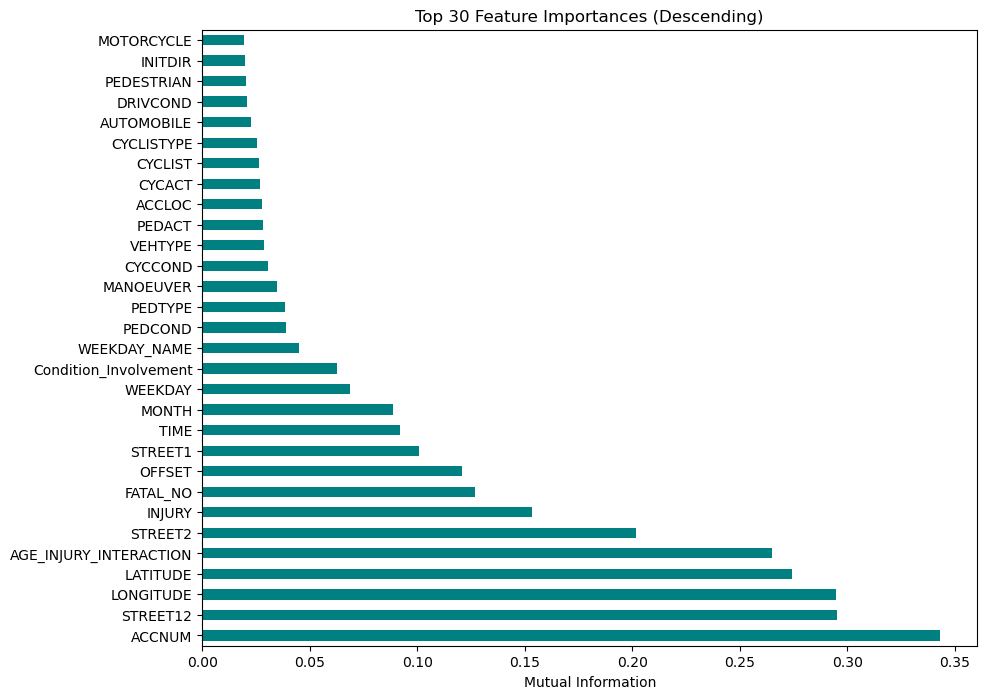

In [95]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

importances = mutual_info_classif(cleaned_df, y_train)
feature_importances = pd.Series(importances, index=cleaned_df.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)
# Select only the top 30 features
top_30_features = feature_importances_sorted.head(30)

# Plot the top 30 feature importances
plt.figure(figsize=(10, 8))
top_30_features.plot(kind='barh', color='teal')
plt.xlabel('Mutual Information')
plt.title('Top 30 Feature Importances (Descending)')
plt.show()

## Chi-square Test

In [96]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [97]:
features_without_negative_values = []
# Iterate through each feature/column in X
for column in cleaned_df.columns:
    # Check if any value in the feature is negative
    if (cleaned_df[column] < 0).any():
        print(f"Feature {column} contains negative values.")
    else:
        features_without_negative_values.append(column)

# Filter X to keep only the features without negative values
X_filtered = cleaned_df[features_without_negative_values]

Feature ACCNUM contains negative values.
Feature OFFSET contains negative values.
Feature LATITUDE contains negative values.
Feature LONGITUDE contains negative values.
Feature VEHTYPE contains negative values.
Feature DRIVACT contains negative values.
Feature DRIVCOND contains negative values.
Feature PEDTYPE contains negative values.
Feature PEDACT contains negative values.
Feature PEDCOND contains negative values.
Feature CYCLISTYPE contains negative values.
Feature CYCACT contains negative values.
Feature CYCCOND contains negative values.
Feature WEEKDAY contains negative values.
Feature MONTH contains negative values.


In [98]:
# Fit SelectKBest on the filtered data
chi2_features = SelectKBest(chi2, k=30)
X_Kbest_features = chi2_features.fit_transform(X_filtered, y_train)

# Get the indices of the selected features
selected_feature_indices = chi2_features.get_support()

# Get the column names of the selected features
selected_feature_names = X_filtered.iloc[:,selected_feature_indices]

# Print the names of the selected features
print("Selected features:")
print(selected_feature_names.columns)


Selected features:
Index(['YEAR', 'TIME', 'STREET1', 'STREET2', 'WARDNUM', 'IMPACTYPE', 'INVAGE',
       'INJURY', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'AG_DRIV', 'REDLIGHT',
       'ALCOHOL', 'HOOD_158', 'NEIGHBOURHOOD_158', 'NEIGHBOURHOOD_140',
       'STREET12', 'INVOLVED_AGE_NEW', 'Condition_Involvement',
       'Alcohol_Speeding', 'Alcohol_Aggressive', 'Speeding_Aggressive',
       'Alcohol_Speeding_Aggressive', 'LOCCOORD&INVOLVEMENT_TYPE',
       'AGE_INJURY_INTERACTION'],
      dtype='object')


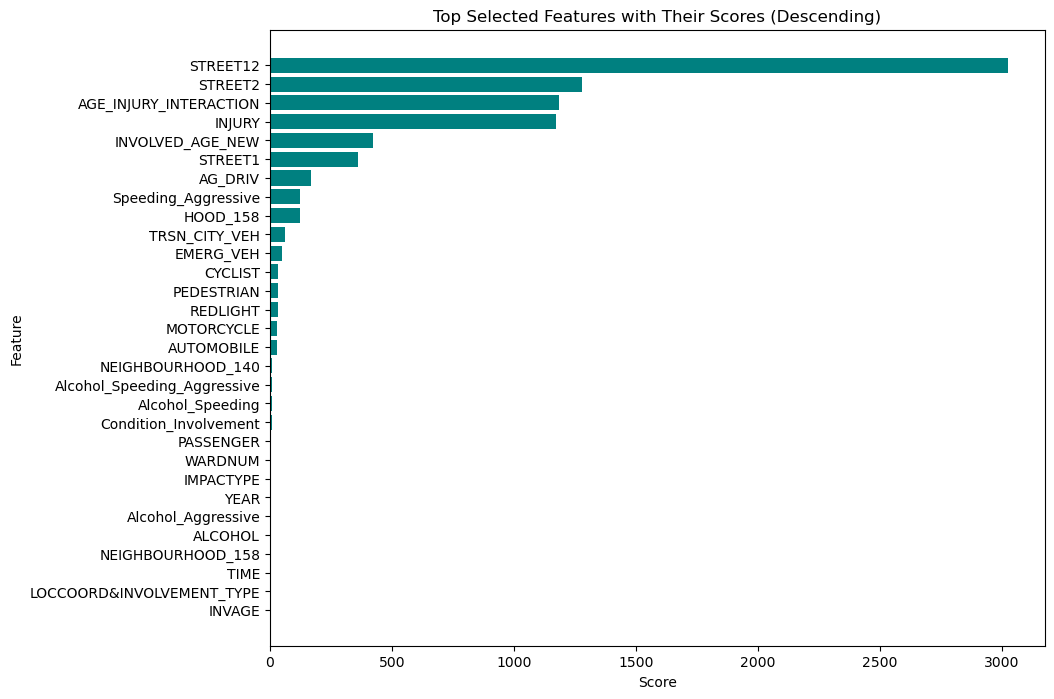

In [99]:
# Get the scores of the selected features
selected_feature_scores = chi2_features.scores_[selected_feature_indices]

# Get the column names of the selected features
selected_feature_names = X_filtered.columns[selected_feature_indices]


# Sort the selected features and their scores in descending order
sorted_indices = selected_feature_scores.argsort()[::-1]
sorted_feature_names = selected_feature_names[sorted_indices]
sorted_feature_scores = selected_feature_scores[sorted_indices]

# Plot the top selected features with their scores
plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_names, sorted_feature_scores, color='teal')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Top Selected Features with Their Scores (Descending)')
plt.gca().invert_yaxis()  # Invert y-axis to have highest score at the top
plt.show()

## Fischer's Score

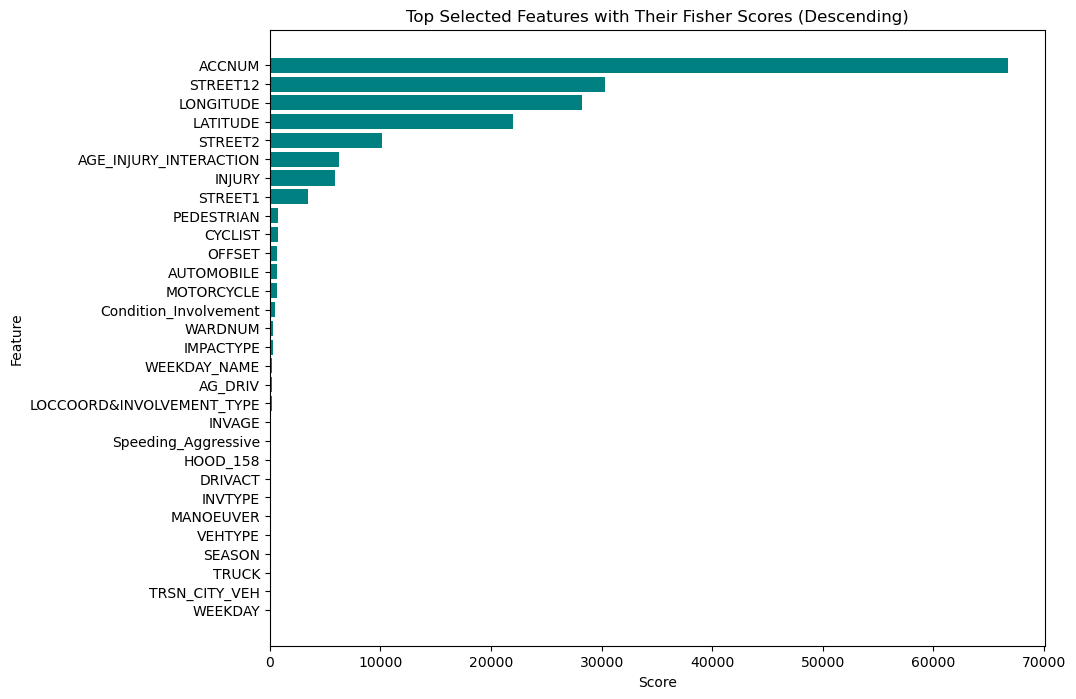

In [100]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

# Fit SelectKBest with Fisher score on the filtered data
fisher_features = SelectKBest(f_classif, k=30)
X_fisher_features = fisher_features.fit_transform(cleaned_df, y_train)

# Get the indices of the selected features
selected_feature_indices = fisher_features.get_support()

# Get the scores of the selected features
selected_feature_scores = fisher_features.scores_[selected_feature_indices]

# Get the column names of the selected features
selected_feature_names = cleaned_df.columns[selected_feature_indices]

# Sort the selected features and their scores in descending order
sorted_indices = selected_feature_scores.argsort()[::-1]
sorted_feature_names = selected_feature_names[sorted_indices]
sorted_feature_scores = selected_feature_scores[sorted_indices]

# Plot the top selected features with their scores
plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_names, sorted_feature_scores, color='teal')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Top Selected Features with Their Fisher Scores (Descending)')
plt.gca().invert_yaxis()  # Invert y-axis to have highest score at the top
plt.show()


## Sequential Feature Selection

In [101]:
cleaned_df.columns

Index(['ACCNUM', 'YEAR', 'TIME', 'STREET1', 'STREET2', 'OFFSET', 'ROAD_CLASS',
       'DISTRICT', 'WARDNUM', 'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC',
       'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE',
       'INVAGE', 'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER',
       'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE',
       'CYCACT', 'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE',
       'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER',
       'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'HOOD_158',
       'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'DIVISION',
       'STREET12', 'WEEKDAY', 'WEEKDAY_NAME', 'MONTH', 'SEASON',
       'INVOLVED_AGE_NEW', 'AGE_CATEGORY', 'Location_Type',
       'Condition_Involvement', 'weather_conditions', 'Alcohol_Speeding',
       'Alcohol_Aggressive', 'Speeding_Aggressive',
       'Alcohol_Speeding_Aggressive', 'LOCCOORD&INVOLVEMENT_TYPE',
      

In [102]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=30)
sfs.fit(cleaned_df, y_train)
SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                          n_features_to_select=30)
sfs.get_support()

array([ True, False, False,  True,  True,  True,  True, False, False,
       False, False,  True, False,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True,  True,
        True, False, False, False, False,  True, False, False,  True,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False,  True,  True])

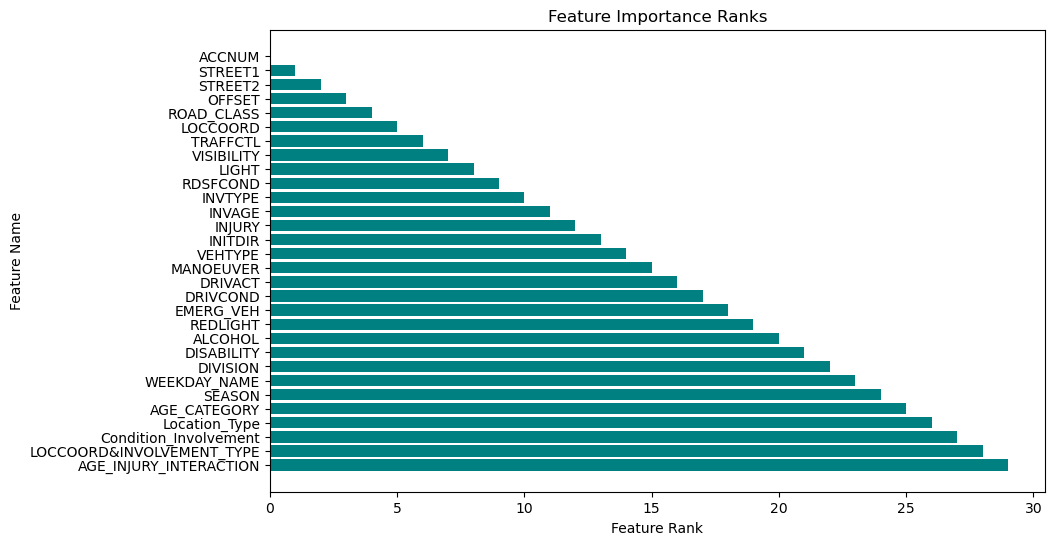

In [103]:
# Get the selected features mask
selected_features_mask = sfs.get_support()

# Get the names of selected features
selected_feature_names_sfs = cleaned_df.columns[selected_features_mask]

# Create a bar graph to show the ranks of the selected features
plt.figure(figsize=(10, 6))
plt.barh(selected_feature_names_sfs, range(len(selected_feature_names_sfs)), color='teal')
plt.xlabel('Feature Rank')
plt.ylabel('Feature Name')
plt.title('Feature Importance Ranks')
plt.gca().invert_yaxis()  # Invert y-axis to have highest rank at the top
plt.show()



## Recursive Feature Elimination

In [104]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


estimator = RandomForestRegressor(n_estimators=50, random_state=0)
selector = RFE(estimator, n_features_to_select=30, step=1)
selector = selector.fit(cleaned_df, y_train)



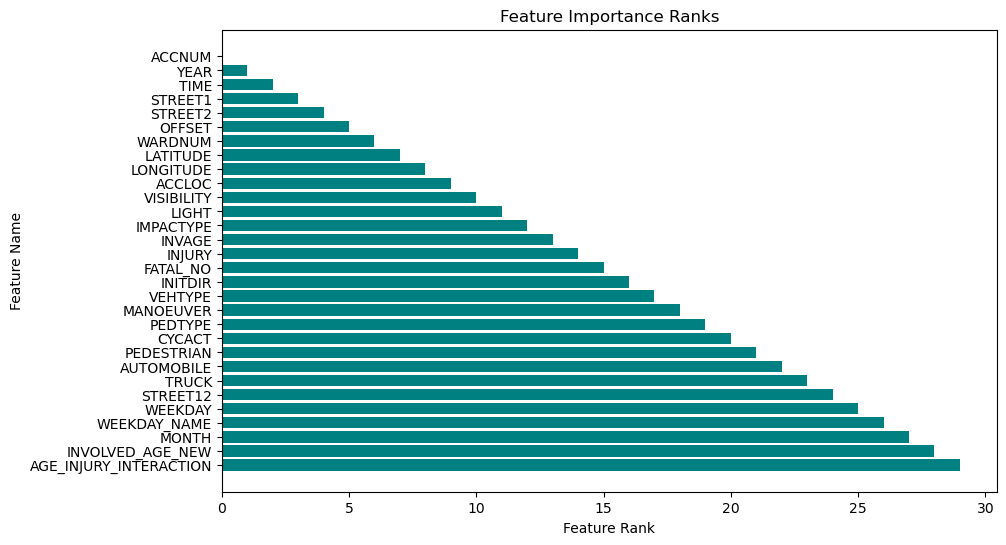

In [105]:
#Get the selected features mask
selected_features_mask =  selector.support_

# Get the names of selected features
selected_feature_names_rfe = cleaned_df.columns[selected_features_mask]

# Create a bar graph to show the ranks of the selected features
plt.figure(figsize=(10, 6))
plt.barh(selected_feature_names_rfe, range(len(selected_feature_names_rfe)), color='teal')
plt.xlabel('Feature Rank')
plt.ylabel('Feature Name')
plt.title('Feature Importance Ranks')
plt.gca().invert_yaxis()  # Invert y-axis to have highest rank at the top
plt.show()


# MODELING

### Preparing test data

In [106]:
df_test= pd.read_csv(r'D:\Downloads\is-the-traffic-collision-fatal\test.csv')
objectId=df_test['ObjectId']
cleaned_test_data=preprocessing_pipeline.transform(df_test)
cleaned_test_df = pd.DataFrame(cleaned_test_data,  columns=preprocessing_pipeline['new_features'].get_feature_names_out(X_val))
cleaned_test_df.columns

Index(['INDEX_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'STREET1', 'STREET2',
       'DIST&DIRECTION', 'ROAD_CLASS', 'DISTRICT', 'TORONTO_WARD_NO',
       'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCIDENT_LOC',
       'TRAFFIC_CONTROL_TYPE', 'VISIBILITY', 'LIGHT', 'ROAD_SURFACE_COND',
       'IMPACTYPE', 'INVOLVEMENT_TYPE', 'INVOLVED_AGE', 'INJURY_SEVERITY',
       'FATAL_NO', 'INITIAL_DIRECTION_VEH', 'VEHTYPE', 'DRIVE_MOVEMENT',
       'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE',
       'CYCACT', 'CYCCOND', 'PEDESTRIAN_BOOL', 'CYCLISTS_BOOL', 'DRIVER_BOOL',
       'MOTORCYCLE_BOOL', 'TRUCK_BOOL', 'TRSN_VEH_BOOL', 'EMERGENCY_VEH_BOOL',
       'PASSENGER_BOOL', 'SPEEDING_BOOL', 'AGGRESSIVE_DRIVE_BOOL',
       'RED_LIGHT_BOOL', 'ALCOHOL_BOOL', 'DISABILITY_BOOL',
       'NEIGHBORHOOD_ID_NEW', 'NEIGHBORHOOD_NEW', 'NEIGHBORHOOD_ID_OLD',
       'NEIGHBORHOOD_OLD', 'TORONTO_POLICE_DIVISION', 'ObjectId'],
      dtype='object')


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\impute\_base.py:558: UserWarning:

Skipping features without any observed values: [ 0 39]. At least one non-missing value is needed for imputation with strategy='mean'.



[IterativeImputer] Completing matrix with shape (3194, 67)
[IterativeImputer] Ending imputation round 1/7, elapsed time 0.07
[IterativeImputer] Ending imputation round 2/7, elapsed time 0.14
[IterativeImputer] Ending imputation round 3/7, elapsed time 0.20
[IterativeImputer] Ending imputation round 4/7, elapsed time 0.26
[IterativeImputer] Ending imputation round 5/7, elapsed time 0.31
[IterativeImputer] Ending imputation round 6/7, elapsed time 0.36
[IterativeImputer] Ending imputation round 7/7, elapsed time 0.40


Index(['ACCNUM', 'YEAR', 'TIME', 'STREET1', 'STREET2', 'OFFSET', 'ROAD_CLASS',
       'DISTRICT', 'WARDNUM', 'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC',
       'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE',
       'INVAGE', 'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER',
       'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE',
       'CYCACT', 'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE',
       'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER',
       'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'HOOD_158',
       'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'DIVISION',
       'STREET12', 'WEEKDAY', 'WEEKDAY_NAME', 'MONTH', 'SEASON',
       'INVOLVED_AGE_NEW', 'AGE_CATEGORY', 'Location_Type',
       'Condition_Involvement', 'weather_conditions', 'Alcohol_Speeding',
       'Alcohol_Aggressive', 'Speeding_Aggressive',
       'Alcohol_Speeding_Aggressive', 'LOCCOORD&INVOLVEMENT_TYPE',
      

### Class for training, validating, and testing machine learning models with optional feature selection and generating predictions.


In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

class ModelTrainer:
    def __init__(self, model, X_train, y_train):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.trained_model = None

    def train_model(self, selected_features=None):
        if selected_features:
            self.model.fit(self.X_train[selected_features], self.y_train)
        else:
            self.model.fit(self.X_train, self.y_train)
        self.trained_model = self.model
        
    def validate_model(self, X_train, y_train, X_val, y_val, selected_features=None):
        train_pred = self.model.predict(X_train[selected_features] if selected_features else X_train)
        # Print classification report for training data
        print("Classification Report for Training Data:")
        print(classification_report(y_train, train_pred))

        pred = self.model.predict(X_val[selected_features] if selected_features else X_val)
        # Print classification report for validation data
        print("Classification Report for Validation Data:")
        print(classification_report(y_val, pred))

    def test_model(self, model, X_test, selected_features=None):
        objectId = df_test['ObjectId']
        predictions = model.predict(X_test[selected_features] if selected_features else X_test)

        predictions = np.where(predictions == 0, 'Non-Fatal Injury', 'Fatal')
        objectId = pd.DataFrame(objectId, columns=['ObjectId'])
        predictions_df = pd.DataFrame(predictions, columns=['ACCCLASS'])

        final_df = pd.concat([objectId, predictions_df], axis=1)
        return final_df



# Catboost Classifier

In [108]:
pip install catboost


Note: you may need to restart the kernel to use updated packages.


In [151]:
from pandas.api.types import is_numeric_dtype
import catboost as cb
from sklearn.metrics import classification_report
import seaborn as sns

In [152]:
y.value_counts()

TARGET
Non-Fatal Injury    12978
Fatal                2022
Name: count, dtype: int64

In [153]:
train_dataset = cb.Pool(cleaned_df[selected_feature_names_rfe],y_train)
test_dataset = cb.Pool(cleaned_val_df[selected_feature_names_rfe],y_val)

In [154]:
catboostmodel = cb.CatBoostClassifier(loss_function='Logloss', eval_metric='Recall',early_stopping_rounds=50)


In [155]:
grid = {'learning_rate': [0.03, 0.1],
'depth': [4, 6, 10],
'l2_leaf_reg': [1, 3, 5,],
'iterations': [50, 100, 150]}

In [156]:
catboostmodel.grid_search(grid,train_dataset)

0:	learn: 0.9076923	test: 0.9181495	best: 0.9181495 (0)	total: 5.13ms	remaining: 252ms
1:	learn: 0.9076923	test: 0.9181495	best: 0.9181495 (0)	total: 9.46ms	remaining: 227ms
2:	learn: 0.9417004	test: 0.9608541	best: 0.9608541 (2)	total: 13.7ms	remaining: 215ms
3:	learn: 0.9449393	test: 0.9679715	best: 0.9679715 (3)	total: 17.8ms	remaining: 205ms
4:	learn: 0.9352227	test: 0.9608541	best: 0.9679715 (3)	total: 23.1ms	remaining: 208ms
5:	learn: 0.9222672	test: 0.9252669	best: 0.9679715 (3)	total: 28.2ms	remaining: 207ms
6:	learn: 0.9449393	test: 0.9608541	best: 0.9679715 (3)	total: 33.1ms	remaining: 203ms
7:	learn: 0.9489879	test: 0.9644128	best: 0.9679715 (3)	total: 37.2ms	remaining: 195ms
8:	learn: 0.9465587	test: 0.9644128	best: 0.9679715 (3)	total: 40.6ms	remaining: 185ms
9:	learn: 0.9489879	test: 0.9644128	best: 0.9679715 (3)	total: 44ms	remaining: 176ms
10:	learn: 0.9497976	test: 0.9679715	best: 0.9679715 (3)	total: 48.1ms	remaining: 171ms
11:	learn: 0.9497976	test: 0.9679715	best: 0

{'params': {'depth': 10,
  'learning_rate': 0.1,
  'l2_leaf_reg': 1,
  'iterations': 100},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45

In [157]:
catboostmodel.get_params()

{'loss_function': 'Logloss',
 'eval_metric': 'Recall',
 'early_stopping_rounds': 50,
 'depth': 10,
 'learning_rate': 0.1,
 'l2_leaf_reg': 1,
 'iterations': 100}

In [158]:
train_pred = catboostmodel.predict(cleaned_df[selected_feature_names_rfe])
# Print classification report for training data
print("Classification Report for Training Data:")
print(classification_report(y_train, train_pred))

pred = catboostmodel.predict(cleaned_val_df[selected_feature_names_rfe])
# Print classification report for validation data
print("Classification Report for Validation Data:")
print(classification_report(y_val, pred))


Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9734
           1       1.00      1.00      1.00      1516

    accuracy                           1.00     11250
   macro avg       1.00      1.00      1.00     11250
weighted avg       1.00      1.00      1.00     11250

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3244
           1       0.96      0.78      0.86       506

    accuracy                           0.97      3750
   macro avg       0.96      0.89      0.92      3750
weighted avg       0.97      0.97      0.96      3750



In [159]:
filename_catboost = 'catboost.sav'
pickle.dump(catboostmodel, open(filename_catboost, 'wb'))

### Making predictions on test data

In [160]:
loaded_catboostmodel = pickle.load(open(filename_catboost, 'rb'))


In [161]:
predictions = loaded_catboostmodel.predict(cleaned_test_df)

predictions = np.where(predictions == 0, 'Non-Fatal Injury', 'Fatal')
objectId= pd.DataFrame(objectId, columns=['ObjectId'])
predictions_df = pd.DataFrame(predictions, columns=['ACCCLASS'])

final_df = pd.concat([objectId,predictions_df], axis=1)
final_df.head()

,ObjectId,ACCCLASS
0,15001,Non-Fatal Injury
1,15002,Non-Fatal Injury
2,15003,Non-Fatal Injury
3,15004,Non-Fatal Injury
4,15005,Non-Fatal Injury


In [162]:
file_path = r'D:\Downloads\is-the-traffic-collision-fatal\final_predictions.csv'

# Save the final DataFrame to a CSV file
final_df.to_csv(file_path, index=False)

print("Final DataFrame saved to:", file_path)

Final DataFrame saved to: D:\Downloads\is-the-traffic-collision-fatal\final_predictions.csv


## XGBOOST

In [121]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

trainer = ModelTrainer(xgb_classifier, cleaned_df, y_train)
trainer.train_model()
trainer.validate_model(cleaned_df,y_train,cleaned_val_df, y_val)



Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9734
           1       1.00      1.00      1.00      1516

    accuracy                           1.00     11250
   macro avg       1.00      1.00      1.00     11250
weighted avg       1.00      1.00      1.00     11250

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3244
           1       0.91      0.80      0.85       506

    accuracy                           0.96      3750
   macro avg       0.94      0.89      0.91      3750
weighted avg       0.96      0.96      0.96      3750



In [122]:
filename_xgboost = 'xgboost.sav'
pickle.dump(xgb_classifier, open(filename_xgboost, 'wb'))

### Making predictions on test data

In [123]:
loaded_xgboost= pickle.load(open(filename_xgboost, 'rb'))

In [124]:
predictions_df_xgboost=trainer.test_model(loaded_xgboost,cleaned_test_df)


In [125]:
file_path = r'D:\Downloads\is-the-traffic-collision-fatal\final_predictions_xgboost.csv'

# Save the final DataFrame to a CSV file
predictions_df_xgboost.to_csv(file_path, index=False)

print("Final DataFrame saved to:", file_path)

Final DataFrame saved to: D:\Downloads\is-the-traffic-collision-fatal\final_predictions_xgboost.csv


## Applying Lightgbm

In [126]:
!pip install lightgbm

In [127]:
pip install --upgrade pandas "dask[complete]"


Note: you may need to restart the kernel to use updated packages.


In [128]:
import lightgbm as lgb 
from lightgbm import LGBMClassifier 

In [129]:
# Create an instance of the LGBMClassifier
lgbm = LGBMClassifier()

trainer = ModelTrainer(lgbm, cleaned_df, y_train)
trainer.train_model()
trainer.validate_model(cleaned_df,y_train,cleaned_val_df, y_val)

[LightGBM] [Info] Number of positive: 1516, number of negative: 9734
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7707
[LightGBM] [Info] Number of data points in the train set: 11250, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.134756 -> initscore=-1.859550
[LightGBM] [Info] Start training from score -1.859550
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9734
           1       1.00      1.00      1.00      1516

    accuracy                           1.00     11250
   macro avg       1.00      1.00      1.00     11250
weighted avg       1.00      1.00      1.00     11250

In [130]:
filename_lgbm = 'lgbm.sav'
pickle.dump(lgbm, open(filename_lgbm, 'wb'))

### Making Predictions on test data

In [131]:
loaded_lgbm= pickle.load(open(filename_lgbm, 'rb'))

In [132]:
predictions_df_lgbm=trainer.test_model(loaded_lgbm,cleaned_test_df)


In [133]:
file_path = r'D:\Downloads\is-the-traffic-collision-fatal\final_predictions_lgbm.csv'

# Save the final DataFrame to a CSV file
predictions_df_lgbm.to_csv(file_path, index=False)

print("Final DataFrame saved to:", file_path)

Final DataFrame saved to: D:\Downloads\is-the-traffic-collision-fatal\final_predictions_lgbm.csv


## Voting Classifier

In [146]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


# Define individual classifiers
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = SVC(kernel='rbf', probability=True, random_state=1)  # SVM with radial kernel
clf4 = KNeighborsClassifier(n_neighbors=5)  # KNN classifier
clf5 = xgb.XGBClassifier()  # XGBoost classifier

# Define VotingClassifier with soft voting
eclf = VotingClassifier(estimators=[
    ('lr', clf1), ('rf', clf2), ('svm', clf3), ('knn', clf4), ('xgb', clf5)],
    voting='soft')

trainer = ModelTrainer(eclf, cleaned_df, y_train)
trainer.train_model()
trainer.validate_model(cleaned_df,y_train,cleaned_val_df, y_val)



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9734
           1       1.00      0.96      0.98      1516

    accuracy                           1.00     11250
   macro avg       1.00      0.98      0.99     11250
weighted avg       1.00      1.00      1.00     11250

Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3244
           1       0.95      0.74      0.83       506

    accuracy                           0.96      3750
   macro avg       0.96      0.87      0.90      3750
weighted avg       0.96      0.96      0.96      3750



In [147]:
filename_voting = 'voting.sav'
pickle.dump(eclf, open(filename_voting, 'wb'))

### Making predictions on test data

In [148]:
loaded_voting= pickle.load(open(filename_voting, 'rb'))

In [149]:
predictions_df_voting=trainer.test_model(loaded_voting,cleaned_test_df)


In [150]:
file_path = r'D:\Downloads\is-the-traffic-collision-fatal\final_predictions_voting.csv'

# Save the final DataFrame to a CSV file
predictions_df_voting.to_csv(file_path, index=False)

print("Final DataFrame saved to:", file_path)

Final DataFrame saved to: D:\Downloads\is-the-traffic-collision-fatal\final_predictions_voting.csv



<div style="background-color: #ccffcc; border: 2px solid #006400; padding: 10px;">
    <b>Conclusion: </b>
Based on the classification report analysis, it is evident that LightGBM and XGBoost and Catboost demonstrated satisfactory performance in terms of recall and precision metrics. However, it was CatBoost that outperformed others on unseen test data during the Kaggle competition, achieving an impressive accuracy of 88.88%. The Voting Classifier secured the second position with an accuracy of 87.12%.

It's noteworthy that overfitting was observed across most classifiers, indicating the need for addressing this issue to enhance generalization performance. Additionally, a potential avenue for improvement could involve manually selecting the top set of features identified by various feature selection techniques, which received the highest votes.

These insights provide valuable directions for refining our models and optimizing feature selection strategies to achieve better performance in future competitions.
</div>

